# CareerFoundry Achievement 6 (Task 1): PART II
#### Research Towards "Edge Computing: Sustainable, Relational AI" (forthcoming)
Co-creators: 
- Amy Zhang (332.0320)
- ChatGPT (0101.0319)

#### Collaborators:
- Perplexity (Instance ID: Perplexity-20250319-1432)
- Perplexity (Instance ID: Perplexity-20250320-1119)
- Perplexity (Instance ID: Perplexity-20250322-1238)
- Perplexity (Instance ID: Perplexity-20250323-1100)


# Data Analysis and Cleaning Process

## Table of Contents

### 1. Data Import and Initial Profiling
- **1a) water_df:** Overview of the dataset, initial profiling, key variables, and potential issues.
- **1b) df_1_USPR:** Similar profiling for the second dataset.
- **1c) df_3_transformed:** Profiling for the third dataset.

### 2. Data Cleaning and Transformation
- **2a) water_df:** Handling missing data, outliers, and standardization for water_df.
- **2b) df_1_USPR:** Cleaning steps specific to df_1_USPR.
- **2c) df_3_transformed:** Cleaning steps specific to df_3_transformed.

### 3. Merging Datasets
- Combining datasets (e.g., water_df + df_1_USPR + df_3_transformed) into a unified structure for analysis.
- Addressing any issues with keys, duplicates, or mismatched data during the merge.

### 4. Exploratory Data Analysis (EDA)
- Visualizing distributions of key variables.
- Identifying patterns over time or across locations.
- Correlation analysis and initial insights.

### 5. Advanced Analysis
- Predictive modeling (if applicable).
- Statistical tests (e.g., hypothesis testing).
- Specialized analyses like time series or geospatial analysis (if relevant).

### 6. Findings and Recommendations
- Summarizing key insights from the analysis.
- Assessing data quality and limitations.
- Providing actionable recommendations for stakeholders or future work.


## 1a) water_df: *Overview of the dataset, initial profiling, key variables, and potential issues.*

### 1. Data Profile of Raw Data

In [337]:
import numpy as np
import pandas as pd
import os

# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/MERGE_water_df.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    water_df = pd.read_csv(file_path)
    # Display dtypes
    print(water_df.dtypes.to_string())
else:
    print(f"File not found: {file_path}")


State                                            object
Year                                              int64
Month                                             int64
Plant Id                                          int64
Cooling_System_ID                                object
Generator_ID                                     object
Boiler_ID                                        object
Generator_Primary_Technology                     object
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)    float64
Coal_Consumption_(MMBTU)                        float64
Natural_Gas_Consumption_(MMBTU)                 float64
Petroleum_Consumption_(MMBTU)                   float64
Water_Type                                       object
Water_Source                                     object
Water_Source_Name                                object
Water_Discharge_Name                             object
Combined_Heat_and_Power_Generator?               object
Type_of_Cooling_System                          

In [338]:
# Count of missing values per column
missing_count = water_df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (missing_count / len(water_df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Display the summary
print(missing_summary)


                                              Missing Count  \
State                                                     0   
Year                                                      0   
Month                                                     0   
Plant Id                                                  0   
Cooling_System_ID                                         0   
Generator_ID                                              0   
Boiler_ID                                                 0   
Generator_Primary_Technology                              0   
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)          18902   
Coal_Consumption_(MMBTU)                              70846   
Natural_Gas_Consumption_(MMBTU)                       23393   
Petroleum_Consumption_(MMBTU)                         63686   
Water_Type                                                0   
Water_Source                                              0   
Water_Source_Name                                      

## Data Filtering for Water Metrics Analysis

Our original dataset, `water_df`, contains 83,081 rows, each representing monthly observations of fuel consumption and water metrics for specific generators and boilers in power plants during 2023. Given our focus on electricity generation and water sustainability, the water-related metrics are crucial to our analysis.

However, we encountered significant missing data in these key water metrics. To address this, we implemented the following approach:

1. We created a filtered dataframe that includes only rows with complete water information.
2. This filtering resulted in 15,677 rows of data with comprehensive water metrics.

### Rationale:
- This approach allows us to gain a more complete understanding of water dynamics in electricity production for a subset of plants.
- While we sacrifice some geographic breadth, we gain depth and reliability in our water usage analysis.
- The resulting dataset, with over 15,000 observations, still provides a substantial basis for meaningful insights.

### Trade-offs:
- We gain: Detailed and complete water usage data for a significant number of plant-months.
- We forego: A broader, but less complete, picture of water dynamics across all US power plants.

This filtered dataset forms the foundation for our subsequent analysis of water sustainability in electricity generation.


In [340]:
# Define water-related columns
water_columns = [
    'Diversion_Rate_(gallons_per_minute)',
    'Withdrawal_Rate_(gallons_per_minute)',
    'Discharge_Rate_(gallons_per_minute)',
    'Consumption_Rate_(gallons_per_minute)',
    'Intake_Average_Temperature_(ºF)',
    'Discharge_Average_Temperature_(ºF)',
    'Withdrawal_Volume_(million_gallons)',
    'Consumption_Volume_(million_gallons)'
]

# Filter rows where all water metrics are not null
filtered_water_df = water_df.dropna(subset=water_columns)


# Check number of rows
print(f"Number of rows with complete water metrics: {len(filtered_water_df)}")


Number of rows with complete water metrics: 15677


In [341]:
filtered_water_df.head

<bound method NDFrame.head of       State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
26       AL  2023      1        10               1-2            1         1   
27       AL  2023      1        10               1-2            2         2   
99       FL  2023      1       136                 1            1         1   
100      FL  2023      1       136                 2            2         2   
122      OK  2023      1       165                 2            2         2   
...     ...   ...    ...       ...               ...          ...       ...   
83032    LA  2023     12     60927             10CWS           1B    1BHRSG   
83033    LA  2023     12     60927             10CWS           1C    1BHRSG   
83058    MI  2023     12     62192                 1           11         1   
83059    MI  2023     12     62192                 1           12         1   
83060    MI  2023     12     62192                 1           1S         1   

           Generator_

In [342]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'filtered_water_df.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
filtered_water_df.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'filtered_water_df.csv' has been created successfully.


## 2. Data Profile of filtered_water_df {#filtered_water_df-raw}

In [344]:
import numpy as np
import pandas as pd
import os

# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/filtered_water_df.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    filtered_water_df = pd.read_csv(file_path)
    # Display dtypes
    print(filtered_water_df.dtypes.to_string())
else:
    print(f"File not found: {file_path}")

State                                            object
Year                                              int64
Month                                             int64
Plant Id                                          int64
Cooling_System_ID                                object
Generator_ID                                     object
Boiler_ID                                        object
Generator_Primary_Technology                     object
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)    float64
Coal_Consumption_(MMBTU)                        float64
Natural_Gas_Consumption_(MMBTU)                 float64
Petroleum_Consumption_(MMBTU)                   float64
Water_Type                                       object
Water_Source                                     object
Water_Source_Name                                object
Water_Discharge_Name                             object
Combined_Heat_and_Power_Generator?               object
Type_of_Cooling_System                          

In [345]:
# 1. Value Counts Output
for column in ['Month', 'Plant Id', 'Cooling_System_ID', 'Type_of_Cooling_System', 'Water_Type', 'Water_Source', 'State', 'Water_Discharge_Name', 'Combined_Heat_and_Power_Generator?']:
    print(f"\nValue Counts for {column}:")
    print(filtered_water_df[column].value_counts().head(10))  # Show top 10 values
    print(f"Unique values: {filtered_water_df[column].nunique()}")



Value Counts for Month:
Month
7     1337
6     1335
9     1327
5     1326
8     1322
11    1313
10    1309
4     1304
3     1282
1     1278
Name: count, dtype: int64
Unique values: 12

Value Counts for Plant Id:
Plant Id
10745    2160
10554    1440
55419     420
7873      384
55464     360
10397     300
7242      288
52006     288
55380     282
634       276
Name: count, dtype: int64
Unique values: 219

Value Counts for Cooling_System_ID:
Cooling_System_ID
SDM46     2160
1         1761
PLANT     1171
TTW-60     720
TTW-70     720
2          692
CT         587
CWS        504
3          469
P3CT       420
Name: count, dtype: int64
Unique values: 135

Value Counts for Type_of_Cooling_System:
Type_of_Cooling_System
Recirculating with Induced Draft Cooling Tower      8150
Once through without cooling pond(s) or canal(s)    3699
Recirculating with Cooling Ponds                    3068
Once through with Cooling Ponds                      513
Recirculating with Natural Draft Cooling Tower    

### Key Findings

#### 1. Month Distribution
- **Even Distribution**: The data is fairly evenly distributed across months.
- **Summer Peaks**: Slightly higher counts in summer months (June, July, August).
- **Winter Lows**: Slightly lower counts in winter months (December, January, February).
- **Unique Months**: 12 unique months are present.

#### 2. Plant Id
- **Diverse Plants**: 219 unique plant IDs indicate a diverse set of power plants.
- **Top Plant**: Plant ID 10745 has the most entries with 2,160 occurrences.

#### 3. Cooling System ID
- **Variety of Systems**: 135 unique cooling system IDs suggest a variety of cooling systems.
- **Most Common ID**: Cooling System ID SDM46 appears 2,160 times.

#### 4. Type of Cooling System
- **Five Types**: Five distinct cooling system types are present.
- **Most Common Type**: Recirculating with Induced Draft Cooling Tower is the most common (8,150 entries).

#### 5. Water Type
- **Predominantly Fresh**: Fresh water is used most frequently (12,455 entries).
- **Unknown and Saline**: Unknown (1,239) and Saline (915) follow in frequency.
- **Six Types**: Six different water types are recorded.

#### 6. Water Source
- **Surface Dominance**: Surface water is the primary source (13,080 entries).
- **Unknown Second**: Unknown is the second most common source (1,239 entries).
- **Five Sources**: Five distinct water sources are identified.

#### 7. State Distribution
- **38 States**: Data from 38 states is included.
- **Top States**: Texas (TX) has the highest representation (3,229 entries), followed by Michigan (MI) and Florida (FL).

#### 8. Water Discharge Name
- **126 Locations**: 126 unique discharge locations are recorded.
- **Unknown Most Common**: "Unknown" is the most common entry (3,262), followed by specific water bodies.

#### 9. Combined Heat and Power Generator
- **Not Combined Predominantly**: Most entries are not combined heat and power generators (9,503 False vs. 6,106 True).
- **Small Unknown**: A small number (68) are listed as Unknown.


## Key Observations from Water Metrics Summary

### 1. Diversion Rate (gallons per minute)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 441.17 | Indicating low average diversion rates |
| Median (50%) | 0 | Suggesting most plants do not divert water |
| Maximum | 477,846 | Showing extreme outliers |
| Distribution | - | Highly skewed with a large standard deviation (6,783.31), driven by a few very high values |

### 2. Withdrawal Rate (gallons per minute)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 86,162.46 | - |
| Median (50%) | 5,460.4 | Much higher than the diversion rate median |
| Maximum | 2,482,870 | Indicating significant variability in withdrawal rates |
| Distribution | - | Skewed with a large standard deviation (217,015.3) |

### 3. Discharge Rate (gallons per minute)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 67,175.75 | - |
| Median (50%) | 310.4 | - |
| Maximum | 2,482,870 | - |
| Distribution | - | Similar to withdrawal rates but slightly lower on average |

### 4. Consumption Rate (gallons per minute)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 1,503.72 | - |
| Median (50%) | 321 | - |
| Maximum | 53,852 | - |
| Distribution | - | Lower variability compared to withdrawal and discharge rates |

### 5. Intake Average Temperature (ºF)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 65.75 | With a median of 68 ºF |
| Maximum | 105 | - |
| Distribution | - | Relatively consistent temperatures with a standard deviation of 15.68 ºF |

### 6. Discharge Average Temperature (ºF)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 75.33 | Higher than intake temperatures on average |
| Maximum | 1,163 | Extreme outlier (likely erroneous or misreported data) |
| Distribution | - | Generally higher than intake temperatures |

### 7. Withdrawal Volume (million gallons)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 3,733.29 | Per observation |
| Median (50%) | 204.31 | - |
| Maximum | 107,260 | Per observation |

### 8. Consumption Volume (million gallons)
| Statistic | Value | Notes |
|-----------|-------|-------|
| Count | 15,677 | - |
| Mean | 263.61 | Per observation |
| Median (50%) | 11.10 | - |
| Maximum | 11,543.90 | Extreme outlier |
| Minimum | -10.43 | Negative values may indicate data entry errors or specific scenarios requiring further investigation |


In [348]:
# Basic Statistical Summary
print(filtered_water_df[water_columns].describe())

       Diversion_Rate_(gallons_per_minute)  \
count                         15677.000000   
mean                            441.171614   
std                            6783.309412   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                          477846.000000   

       Withdrawal_Rate_(gallons_per_minute)  \
count                          1.567700e+04   
mean                           8.616246e+04   
std                            2.170153e+05   
min                            0.000000e+00   
25%                            1.173100e+03   
50%                            5.460400e+03   
75%                            6.000000e+04   
max                            2.482870e+06   

       Discharge_Rate_(gallons_per_minute)  \
count                         1.567700e+04   
mean                          6.717575e+04   
std                    

In [349]:
filtered_water_df['Hours_in_Service'].head(10)

0    744.0
1    744.0
2    417.0
3    612.0
4    131.0
5    718.0
6    718.0
7    744.0
8    744.0
9    744.0
Name: Hours_in_Service, dtype: float64

## Now...we attempt to choose the right Water Metrics to focus on....

In [351]:
# Analyze Zero Values
def zero_percentage(df, columns):
    return (df[columns] == 0).mean() * 100

print("Rate metrics zero percentage:")
print(zero_percentage(filtered_water_df, rate_metrics))
print("\nVolume metrics zero percentage:")
print(zero_percentage(filtered_water_df, volume_metrics))


Rate metrics zero percentage:
Diversion_Rate_(gallons_per_minute)      95.011801
Withdrawal_Rate_(gallons_per_minute)      1.932768
Discharge_Rate_(gallons_per_minute)      21.809020
Consumption_Rate_(gallons_per_minute)    37.736812
dtype: float64

Volume metrics zero percentage:
Diversion_Volume_(million_gallons)      94.003955
Withdrawal_Volume_(million_gallons)      1.773298
Discharge_Volume_(million_gallons)      21.770747
Consumption_Volume_(million_gallons)    37.092556
dtype: float64


In [352]:
#Compare Consistency

for rate, volume in zip(rate_metrics, volume_metrics):
    correlation = filtered_water_df[rate].corr(filtered_water_df[volume])
    print(f"Correlation between {rate} and {volume}: {correlation:.2f}")


Correlation between Diversion_Rate_(gallons_per_minute) and Diversion_Volume_(million_gallons): 1.00
Correlation between Withdrawal_Rate_(gallons_per_minute) and Withdrawal_Volume_(million_gallons): 0.99
Correlation between Discharge_Rate_(gallons_per_minute) and Discharge_Volume_(million_gallons): 0.97
Correlation between Consumption_Rate_(gallons_per_minute) and Consumption_Volume_(million_gallons): 0.41


Zero Percentage Comparison:

The zero percentages for Rate and Volume metrics are very similar across all categories.

Diversion has the highest zero percentage (about 95% for both Rate and Volume).

Withdrawal has the lowest zero percentage (about 1.9% for Rate and 1.8% for Volume).

Discharge and Consumption have moderate zero percentages, with Consumption being higher.

Correlation Analysis:

Diversion, Withdrawal, and Discharge show very high correlations (0.97-1.00) between their Rate and Volume metrics.

Consumption shows a moderate correlation (0.41) between its Rate and Volume metrics.

Completeness:

The similarity in zero percentages suggests that both Rate and Volume metrics have similar levels of completeness.

The high correlations for most metrics indicate consistency between Rate and Volume measurements.

Reliability:

Withdrawal metrics appear to be the most reliable, with the lowest zero percentage and high correlation.

Diversion metrics, despite high correlation, have a very high zero percentage, indicating limited usefulness.

Discharge metrics show good reliability with moderate zero percentage and high correlation.

Consumption metrics show some inconsistency between Rate and Volume, as indicated by the lower correlation.

Conclusion:
Both Rate and Volume metrics appear to be equally complete. However, the choice between using Rate or Volume metrics may depend on the specific analysis needs:

For Diversion, Withdrawal, and Discharge, either Rate or Volume metrics can be used interchangeably due to high correlations.

For Consumption, it may be worth investigating the discrepancy between Rate and Volume metrics further before deciding which to use.

Overall, the Withdrawal and Discharge metrics seem to be the most reliable and complete, while Diversion metrics may have limited usefulness due to the high percentage of zero values.

# Considerations for Deriving Consumption Volume from Withdrawal and Discharge Rates

## Key Considerations

### 1. Formula for Consumption Volume
The most straightforward method for deriving Consumption Volume from Withdrawal and Discharge is:

Consumption Volume = Withdrawal Volume - Discharge Volume

This approach assumes that the difference between what is withdrawn and what is discharged represents the consumed water—water that is lost or used in the process but not returned.

### 2. Assumptions to Document
- Discharge represents water returned to the system (likely into a river, lake, etc.), which means consumption is what has been withdrawn but not discharged.
- Variations may exist between Discharge and Consumption, especially in cases of evaporation or leakage—be mindful of this if it could impact the calculation.
- Data quality is critical—verify that Discharge and Withdrawal metrics are reliable before making conclusions based on the derived Consumption.

### 3. Efficiency Insights
- High Withdrawal with low Discharge suggests inefficient water use or high consumption.
- Similar Withdrawal and Discharge values suggest efficient water recycling or minimal consumption.
- Low Withdrawal with high Discharge could indicate water generation in the process (e.g., through evaporation) or measurement errors.

### 4. Water Usage Efficiency Ratios
- Water Efficiency Ratio (WE):
  WE = Discharge / Withdrawal
- Water Usage Efficiency (WUE):
  WUE = 1 - (Consumption / Withdrawal)
- High ratios indicate better water usage efficiency, which could provide insights into how effectively water is being managed and recycled.

### 5. Cooling System Efficiency
- Once-through cooling systems: High Withdrawal and Discharge, but typically lower Consumption.
- Recirculating systems: Lower Withdrawal and Discharge, but higher Consumption due to evaporation.

### 6. Impact of Water Stress
In water-stressed regions, focusing on reducing both Withdrawal and Consumption is essential. By understanding the relationship between these metrics, you can prioritize water management strategies for efficient usage.

### 7. Regulatory Compliance
Regulatory bodies often require data on Withdrawal and Discharge for environmental reporting. By analyzing these metrics together, you can demonstrate compliance with water use regulations.

### 8. Improvement Tracking
Monitoring changes in Withdrawal and Discharge over time can reveal how effectively water conservation efforts are progressing and whether technological improvements in water recycling and cooling are having the desired effect.

---

By deriving Consumption Volume from Withdrawal and Discharge and considering these key points, you'll gain a more comprehensive understanding of water usage efficiency. This can help identify areas for improvement in water management, technological choices, and regulatory compliance.

Attribution: Amy Zhang (instance 322.0322); ChatGPT (instance 0101.0322); Perplexity (Instance ID: Perplexity-20250322-1238)


In [355]:
# List of relevant columns
columns_to_check = ['Withdrawal_Volume_(million_gallons)', 'Discharge_Volume_(million_gallons)']

# Function to calculate negative value statistics
def investigate_negatives(df, columns):
    for col in columns:
        print(f"Column: {col}")
        negative_count = (df[col] < 0).sum()
        total_count = len(df[col])
        negative_percentage = (negative_count / total_count) * 100
        negative_values = df[df[col] < 0][col]
        
        print(f"  Total rows: {total_count}")
        print(f"  Negative values: {negative_count} ({negative_percentage:.2f}%)")
        if negative_count > 0:
            print(f"  Min negative value: {negative_values.min()}")
            print(f"  Max negative value: {negative_values.max()}")
            print(f"  Mean of negative values: {negative_values.mean():.2f}")
        print("-" * 40)

# Investigate negative values in the relevant columns
investigate_negatives(filtered_water_df, columns_to_check)


Column: Withdrawal_Volume_(million_gallons)
  Total rows: 15677
  Negative values: 0 (0.00%)
----------------------------------------
Column: Discharge_Volume_(million_gallons)
  Total rows: 15677
  Negative values: 0 (0.00%)
----------------------------------------


In [356]:
# Calculate new Consumption and store in a new column
filtered_water_df['Consumption_Volume_Derived_(million_gallons)'] = (
    filtered_water_df['Withdrawal_Volume_(million_gallons)'] - 
    filtered_water_df['Discharge_Volume_(million_gallons)']
).clip(lower=0)  # Ensure consumption is not negative

# Update the Water Usage Efficiency calculation to use the derived consumption
filtered_water_df['Water_Usage_Efficiency'] = 1 - filtered_water_df['Consumption_Volume_Derived_(million_gallons)'] / filtered_water_df['Withdrawal_Volume_(million_gallons)']

# Calculate the difference
filtered_water_df['Consumption_Difference'] = filtered_water_df['Consumption_Volume_Derived_(million_gallons)'] - filtered_water_df['Consumption_Volume_(million_gallons)']

# View summary of the difference
print(filtered_water_df['Consumption_Difference'].describe())

# Count how many are exactly the same
exact_match = (filtered_water_df['Consumption_Difference'] == 0).sum()
print(f"Number of exact matches: {exact_match}")

# Count how many are within 1% difference
close_match = (filtered_water_df['Consumption_Difference'].abs() <= 0.01 * filtered_water_df['Consumption_Volume_(million_gallons)']).sum()
print(f"Number of values within 1% difference: {close_match}")


count    15677.000000
mean       608.384692
std       4037.246715
min      -9486.982000
25%          0.000000
50%          0.000000
75%          0.001000
max      61262.999000
Name: Consumption_Difference, dtype: float64
Number of exact matches: 7483
Number of values within 1% difference: 11664


Exact Matches (7483): This is pretty solid, over 45% of the observations have no difference. So that's a strong foundation.

Values within 1% Difference (11664): Over 70% match within 1%—that’s pretty impressive and suggests that, even if there's some error or fluctuation, the overall derived volume is close to the original for most cases.

In [418]:
# New Column: Consumption_Pct_Variation -- how off is the Derived Consumption Volume from original? 
filtered_water_df['Consumption_Pct_Variation'] = (
    (filtered_water_df['Consumption_Volume_Derived_(million_gallons)'] - filtered_water_df['Consumption_Volume_(million_gallons)']) / 
    filtered_water_df['Consumption_Volume_(million_gallons)']
) * 100

# Handle division by zero cases
filtered_water_df['Consumption_Pct_Variation'] = filtered_water_df['Consumption_Pct_Variation'].replace([np.inf, -np.inf], np.nan)


In [420]:
# Dataframes for matching vs. non-matching

exact_match_df = filtered_water_df[filtered_water_df['Consumption_Difference'] == 0]
non_match_df = filtered_water_df[filtered_water_df['Consumption_Difference'] != 0]

print(f"Number of exact matches: {len(exact_match_df)}")
print(f"Number of non-matches: {len(non_match_df)}")


Number of exact matches: 7483
Number of non-matches: 8194


Analysis by Type of Cooling System:
                                                 Consumption_Difference  \
                                                                   mean   
Type_of_Cooling_System                                                    
Once through with Cooling Ponds                             3864.253121   
Once through without cooling pond(s) or canal(s)             185.652685   
Recirculating with Cooling Ponds                            3079.490276   
Recirculating with Induced Draft Cooling Tower                95.258588   
Recirculating with Natural Draft Cooling Tower                 0.353336   

                                                                \
                                                           std   
Type_of_Cooling_System                                           
Once through with Cooling Ponds                   11061.629149   
Once through without cooling pond(s) or canal(s)   1910.963426   
Recirculating with Cooling Ponds 

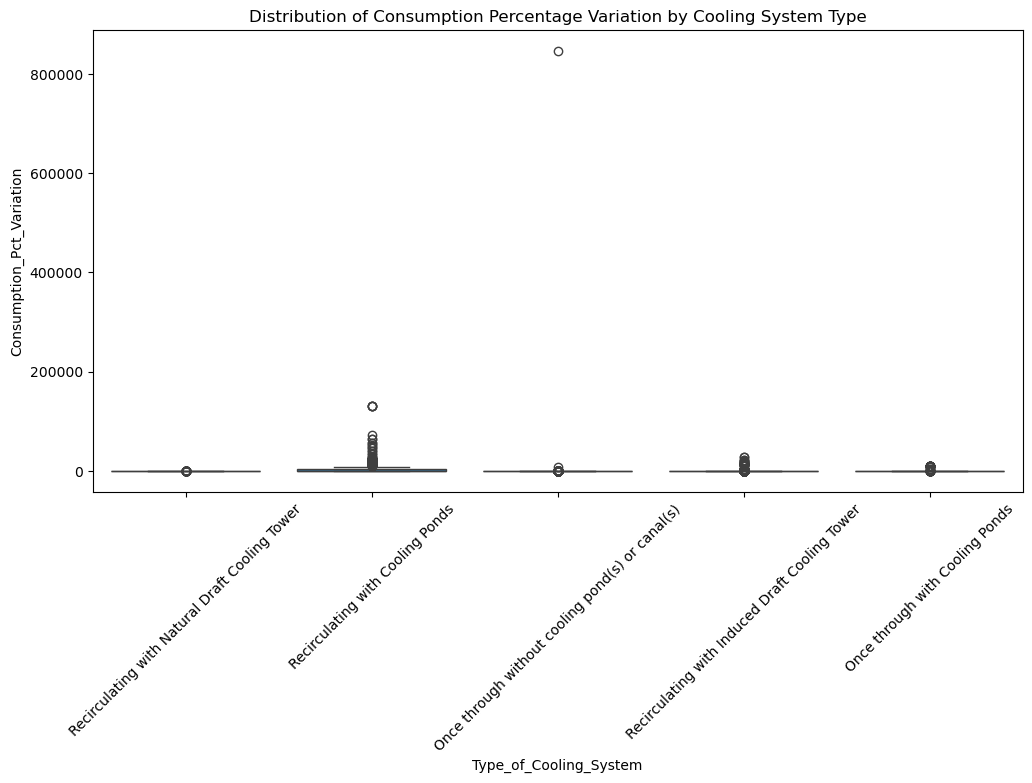


Correlation Matrix:
Consumption_Pct_Variation              1.000000
Withdrawal_Volume_(million_gallons)    0.074590
Discharge_Volume_(million_gallons)    -0.011385
Water_Usage_Efficiency                -0.066532
Name: Consumption_Pct_Variation, dtype: float64


In [426]:
# Explore factors leading to non-match

# Analyze Type_of_Cooling_System
cooling_system_analysis = non_match_df.groupby('Type_of_Cooling_System').agg({
    'Consumption_Difference': ['mean', 'std'],
    'Consumption_Pct_Variation': ['mean', 'std']
})

print("Analysis by Type of Cooling System:")
print(cooling_system_analysis)

# Visualize the distribution of differences by cooling system type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_of_Cooling_System', y='Consumption_Pct_Variation', data=non_match_df)
plt.title('Distribution of Consumption Percentage Variation by Cooling System Type')
plt.xticks(rotation=45)
plt.show()

# Check correlation with other numerical variables
correlation_matrix = non_match_df[[
    'Consumption_Pct_Variation', 'Withdrawal_Volume_(million_gallons)', 
    'Discharge_Volume_(million_gallons)', 'Water_Usage_Efficiency'
]].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix['Consumption_Pct_Variation'])


The weak correlations suggest that the discrepancies between derived and original consumption values are not strongly linked to the volume of water withdrawn or discharged, nor to the overall efficiency of water usage.

| Cooling System Type | Mean Difference | Percentage Variation | Standard Deviation | Notes |
|---------------------|-----------------|----------------------|--------------------|-------|
| Recirculating with Natural Draft Cooling Tower | 0.353336 | -2.645644% | Lowest | Most consistent calculations |
| Recirculating with Induced Draft Cooling Tower | 95.258588 | 217.986296% | Moderate | Moderate differences |
| Once through without cooling pond(s) or canal(s) | 185.652685 | 2376.741770% | 44583.963378% | Extremely high variation, suggests outliers |
| Once through with Cooling Ponds | 3864.253121 | 1082.056166% | Very high | Significant variability |
| Recirculating with Cooling Ponds | 3079.490276 | 3990.806729% | Very high | Significant variability |

### Key Findings:
1. The calculation method works best for Recirculating with Natural Draft Cooling Tower systems.
2. Significant discrepancies exist for systems using cooling ponds, both once-through and recirculating.
3. Extremely high percentage variations, especially for "Once through without cooling pond(s) or canal(s)", indicate potential data quality issues or fundamental differences in consumption calculation or measurement methods.


# Detour on Deriving Consumption Volume

## Original Assumption
We initially hypothesized that we could derive a Consumption Volume column using existing metrics like Withdrawal and Discharge, with the idea that this would provide a consistent and comprehensive set of consumption data.

## Findings
Upon comparison between the original and derived Consumption Volume columns, we encountered the following results:

- Number of exact matches: 7,483
- Number of non-matches: 8,194

## Key Insight
While a large portion of the data showed exact matches (45%), the differences (over 50%) highlighted that the derived values were not consistently aligned with the original column, especially for certain types of cooling systems. This suggests that the assumptions behind deriving the values (such as treating all cooling systems uniformly) didn't hold up well.

## Conclusion
**Better to respect the differences between types of cooling systems:** The derived approach doesn't account for the nuances between different types of cooling systems, which could result in misleading or inconsistent consumption values.

**Backtracking:** Given the inconsistencies, we decided to not derive consumption volume and instead focus on cleaning and refining the original column. This approach will likely provide more reliable and accurate insights.

---

*Attribution: Amy Zhang (instance 322.0322); ChatGPT (instance 0101.0322); Perplexity (Instance ID: Perplexity-20250322-1238)*


# BACK TO CLEANING THE ORIGINAL CONSUMPTION VOLUME COLUMN 😭

# Cleaning the Original Consumption Volume Column

## Step 1: Identify Issues in the Data
Before cleaning, inspect the `Consumption_Volume_(million_gallons)` column for potential issues:
- **Missing values**: Check if there are any null or NaN entries.
- **Negative values**: Identify if there are any negative values that might indicate errors or special cases.
- **Outliers**: Detect extreme values that may not align with expected ranges.
- **Inconsistencies**: Look for formatting or data type issues (e.g., strings instead of numbers).

In [438]:
print(filtered_water_df['Consumption_Volume_(million_gallons)'].describe())

count    15677.000000
mean       263.612638
std       1339.944765
min        -10.431000
25%          0.000000
50%         11.100000
75%         69.569000
max      11543.904000
Name: Consumption_Volume_(million_gallons), dtype: float64


In [440]:
# Check for missing values
missing_count = filtered_water_df['Consumption_Volume_(million_gallons)'].isna().sum()
print(f"Missing values: {missing_count}")

Missing values: 0


In [455]:
# Check for negative values
negative_consumption_rows = filtered_water_df[filtered_water_df['Consumption_Volume_(million_gallons)'] < 0]

# Display the full rows
print(negative_consumption_rows)


      State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
1618     WI  2023      2      4078                 3            3         3   
3040     FL  2023      3      7846                 2          002     HRSG2   
3041     FL  2023      3      7846                 2          003     HRSG2   
3042     FL  2023      3      7846                 2          004     HRSG2   
3043     FL  2023      3      7846                 3          002     HRSG3   
3044     FL  2023      3      7846                 3          003     HRSG3   
3045     FL  2023      3      7846                 3          004     HRSG3   
4190     WI  2023      4      4078                 3            3         3   
10824    WI  2023      9      4078                 3            3         3   
12007    NC  2023     10      2723                 7          CT8     HRSG1   
12008    NC  2023     10      2723                 7          CT9     HRSG1   
12009    NC  2023     10      2723                 7

In [459]:
# Create a new column 'Negative_Consumption_Flag'
filtered_water_df['Negative_Consumption_Flag'] = (filtered_water_df['Consumption_Volume_(million_gallons)'] < 0).astype(int)

# Now you have a column where 1 indicates a negative consumption value, and 0 indicates a non-negative value

# You can verify the flagging by checking the sum of the new column
print(f"Number of rows with negative consumption: {filtered_water_df['Negative_Consumption_Flag'].sum()}")

# To see all flagged rows:
negative_rows = filtered_water_df[filtered_water_df['Negative_Consumption_Flag'] == 1]
print(negative_rows)


Number of rows with negative consumption: 15
      State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
1618     WI  2023      2      4078                 3            3         3   
3040     FL  2023      3      7846                 2          002     HRSG2   
3041     FL  2023      3      7846                 2          003     HRSG2   
3042     FL  2023      3      7846                 2          004     HRSG2   
3043     FL  2023      3      7846                 3          002     HRSG3   
3044     FL  2023      3      7846                 3          003     HRSG3   
3045     FL  2023      3      7846                 3          004     HRSG3   
4190     WI  2023      4      4078                 3            3         3   
10824    WI  2023      9      4078                 3            3         3   
12007    NC  2023     10      2723                 7          CT8     HRSG1   
12008    NC  2023     10      2723                 7          CT9     HRSG1   
12009  

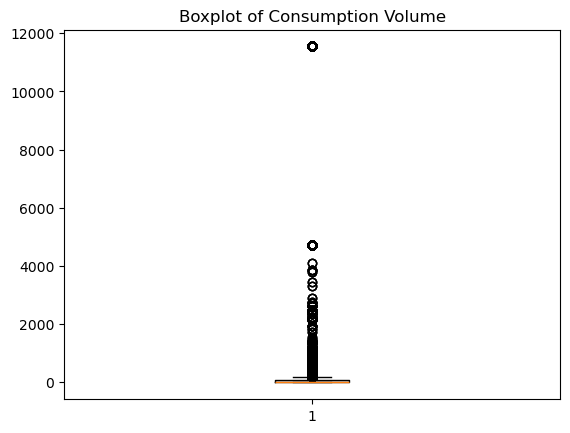

In [446]:
# Visualize outliers
import matplotlib.pyplot as plt
plt.boxplot(filtered_water_df['Consumption_Volume_(million_gallons)'].dropna())
plt.title('Boxplot of Consumption Volume')
plt.show()

In [463]:
# Calculate Q1, Q3, and IQR
Q1 = filtered_water_df['Consumption_Volume_(million_gallons)'].quantile(0.25)
Q3 = filtered_water_df['Consumption_Volume_(million_gallons)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Consumption_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Consumption_Volume_(million_gallons)'] > upper_bound)]

# Get the number of outlier rows
num_outlier_rows = outlier_rows.shape[0]

# Get the number of unique Plant IDs in outlier rows
unique_plant_ids = outlier_rows['Plant Id'].nunique()

print(f"Number of outlier rows: {num_outlier_rows}")
print(f"Number of unique Plant IDs in outlier rows: {unique_plant_ids}")


Number of outlier rows: 1635
Number of unique Plant IDs in outlier rows: 54


Consumption Volume Outlier counts by Plant ID:
Plant Id
10745    540
50733    108
6073     108
55524     90
1396      86
3804      66
1733      48
889       36
6068      27
1925      24
3166      24
869       24
6105      24
6023      24
6036      24
6026      22
6022      22
6040      22
3460      21
1356      18
8023      17
1001      16
3457      14
2589      12
6641      12
1402      12
1729      12
55502     12
6149      12
6015      12
6020      11
6118      11
371       11
7097      11
8055      11
204       10
6090      10
6462       9
2049       9
58697      9
389        7
6139       6
210        6
7512       6
3611       5
6250       2
6178       2
6071       2
56671      2
3944       2
3470       1
1915       1
6823       1
3612       1
Name: count, dtype: int64


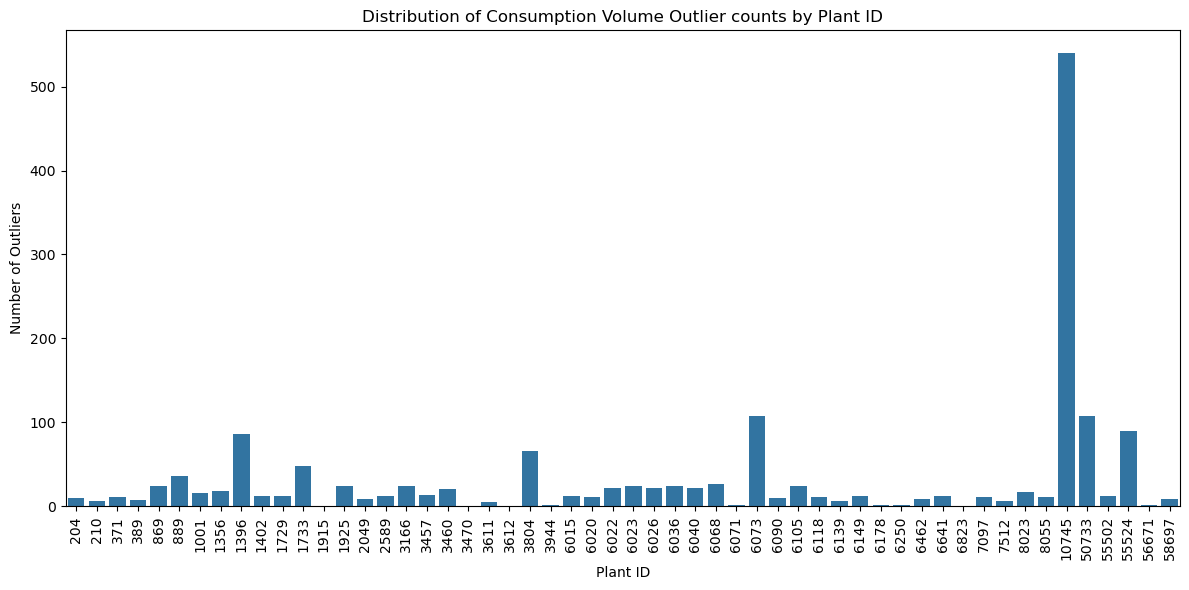

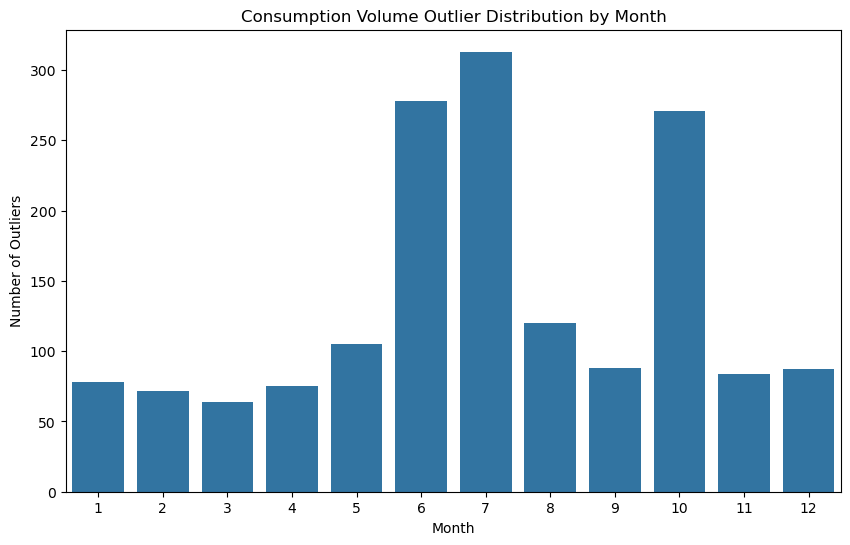

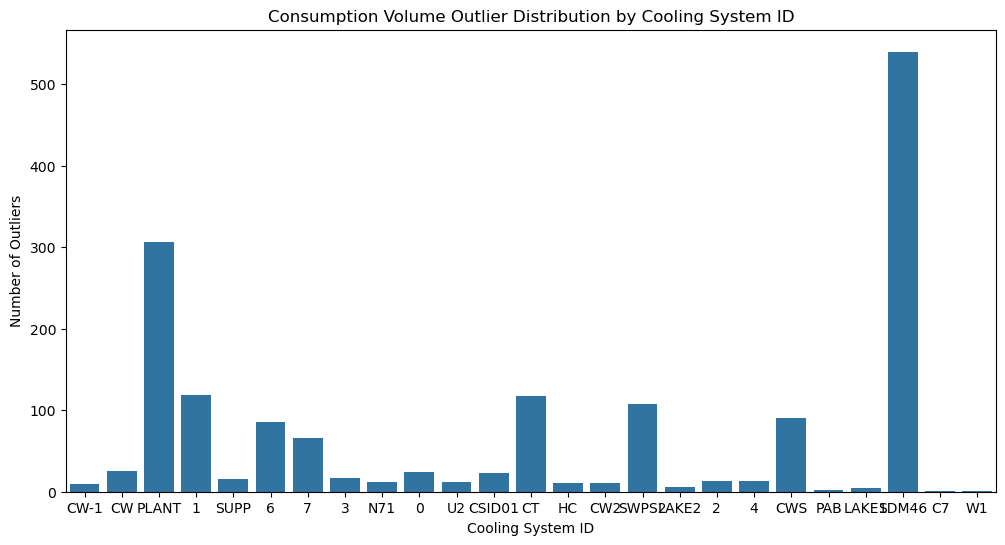

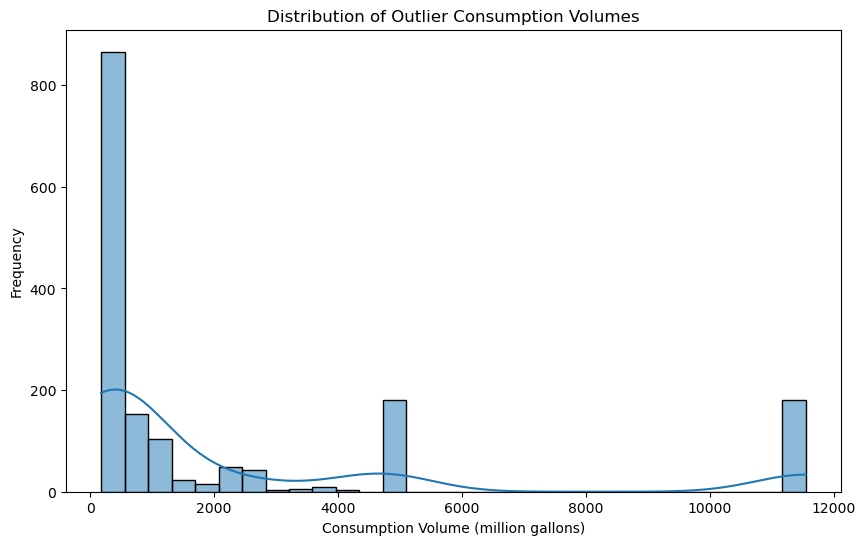

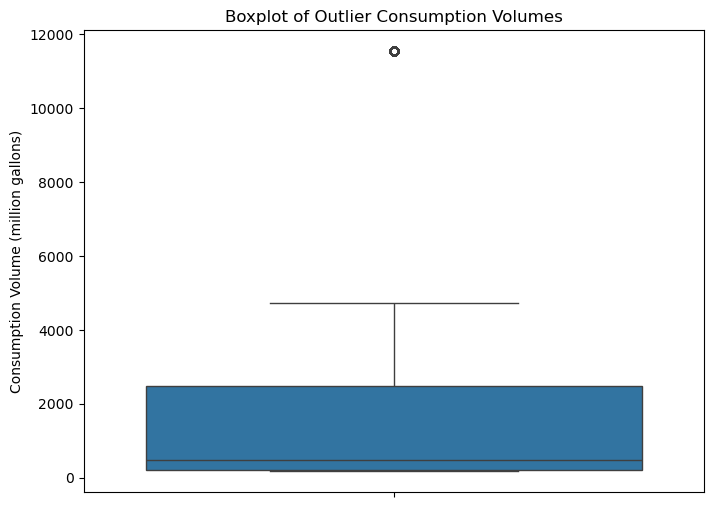

In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = filtered_water_df['Consumption_Volume_(million_gallons)'].quantile(0.25)
Q3 = filtered_water_df['Consumption_Volume_(million_gallons)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Consumption_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Consumption_Volume_(million_gallons)'] > upper_bound)]

# 1. Identify Patterns Across Plant IDs
plant_id_outlier_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Consumption Volume Outlier counts by Plant ID:")
print(plant_id_outlier_counts)

# Plot distribution of outliers by Plant ID
plt.figure(figsize=(12, 6))
sns.barplot(x=plant_id_outlier_counts.index, y=plant_id_outlier_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Consumption Volume Outlier counts by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Number of Outliers')
plt.tight_layout()
plt.show()

# 2. Look at Other Factors (Month, Year, Cooling System)
# Month
plt.figure(figsize=(10, 6))
sns.countplot(data=outlier_rows, x='Month')
plt.title('Consumption Volume Outlier Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.show()

# Cooling System
plt.figure(figsize=(12, 6))
sns.countplot(data=outlier_rows, x='Cooling_System_ID')
plt.title('Consumption Volume Outlier Distribution by Cooling System ID')
plt.xlabel('Cooling System ID')
plt.ylabel('Number of Outliers')
plt.show()

# 3. Examine the Range of Outliers
# Histogram of outlier consumption values
plt.figure(figsize=(10, 6))
sns.histplot(outlier_rows['Consumption_Volume_(million_gallons)'], kde=True)
plt.title('Distribution of Outlier Consumption Volumes')
plt.xlabel('Consumption Volume (million gallons)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of outlier consumption values
plt.figure(figsize=(8, 6))
sns.boxplot(y=outlier_rows['Consumption_Volume_(million_gallons)'])
plt.title('Boxplot of Outlier Consumption Volumes')
plt.ylabel('Consumption Volume (million gallons)')
plt.show()


In [477]:
# 1. Count of Outliers by Plant ID
plant_id_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Count of Outliers by Plant ID:")
print(plant_id_counts)

# 2. Count of Outliers by Month
month_counts = outlier_rows['Month'].value_counts().sort_index()
print("\nCount of Outliers by Month:")
print(month_counts)

# 3. Count of Outliers by Type_of_Cooling_System
Type_of_Cooling_System_counts = outlier_rows['Type_of_Cooling_System'].value_counts().sort_index()
print("\nCount of Outliers by Type_of_Cooling_System:")
print(Type_of_Cooling_System_counts)

# 4. Count of Outliers by Cooling System ID
cooling_system_counts = outlier_rows['Cooling_System_ID'].value_counts().sort_index()
print("\nCount of Outliers by Cooling System ID:")
print(cooling_system_counts)

# 5. Count of Outliers by Water_Type
Water_Type_counts = outlier_rows['Water_Type'].value_counts().sort_index()
print("\nCount of Outliers by Water_Type:")
print(Water_Type_counts)

# 6. Count of Outliers by Water_Source
Water_Source_counts = outlier_rows['Water_Source'].value_counts().sort_index()
print("\nCount of Outliers by Water_Source:")
print(Water_Source_counts)

Count of Outliers by Plant ID:
Plant Id
10745    540
50733    108
6073     108
55524     90
1396      86
3804      66
1733      48
889       36
6068      27
1925      24
3166      24
869       24
6105      24
6023      24
6036      24
6026      22
6022      22
6040      22
3460      21
1356      18
8023      17
1001      16
3457      14
2589      12
6641      12
1402      12
1729      12
55502     12
6149      12
6015      12
6020      11
6118      11
371       11
7097      11
8055      11
204       10
6090      10
6462       9
2049       9
58697      9
389        7
6139       6
210        6
7512       6
3611       5
6250       2
6178       2
6071       2
56671      2
3944       2
3470       1
1915       1
6823       1
3612       1
Name: count, dtype: int64

Count of Outliers by Month:
Month
1      78
2      72
3      64
4      75
5     105
6     278
7     313
8     120
9      88
10    271
11     84
12     87
Name: count, dtype: int64

Count of Outliers by Type_of_Cooling_System:
Type_

--

# Step 4: DECISION: Flag Outliers

This decision serves the following aims:

### 1. Uncover Hidden Patterns
By isolating the outliers and flagging them, we preserve the instances that might reveal hidden operational inefficiencies or anomalies. This can drive actionable insights about why these outliers exist and what they indicate about plant operations, cooling systems, or water types.

### 2. Insight into Data Collection Processes
Some outliers could stem from flaws in the data collection process itself—whether it's an instrument malfunction, misreporting, or seasonal fluctuations not accounted for in the system. Flagging them allows us to potentially refine the data collection practices, leading to more accurate and reliable reporting in the future.

### 3. Actionable Recommendations for Sustainability
Outliers could reveal areas where water use is inconsistent or inefficient, which is huge for sustainability efforts. If certain plants or systems have outliers tied to excessive water usage or inefficiencies in cooling, this can directly feed into recommendations for better water management, equipment upgrades, or system redesigns to improve sustainability.

---

**Attribution**:  
ChatGPT (instance 0101.0322)  
Amy Zhang (instance 332.0322)


In [488]:
# Create the 'Outlier_Flag' column
filtered_water_df['Outlier_Flag_Consumption'] = ((filtered_water_df['Consumption_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Consumption_Volume_(million_gallons)'] > upper_bound)).astype(int)

# Verify the flagging
print(filtered_water_df['Outlier_Flag_Consumption'].value_counts())

# Display some of the outlier rows to confirm
outlier_rows_consumption = filtered_water_df[filtered_water_df['Outlier_Flag_Consumption'] == 1].head()
print("\nSample Outlier Rows:")
print(outlier_rows_consumption)

Outlier_Flag_Consumption
0    14042
1     1635
Name: count, dtype: int64

Sample Outlier Rows:
   State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
7     IL  2023      1       204              CW-1            1      NSS1   
9     WA  2023      1       371                CW            2      NSS2   
70    IL  2023      1       869             PLANT            2      NSS2   
71    IL  2023      1       869             PLANT            3      NSS3   
78    IL  2023      1       889                 1            3         3   

   Generator_Primary_Technology  Fuel_Consumption_from_All_Fuel_Types_(MMBTU)  \
7                       Nuclear                                           NaN   
9                       Nuclear                                           NaN   
70                      Nuclear                                           NaN   
71                      Nuclear                                           NaN   
78      Conventional Steam Coal            

# Cleaning the Withdrawal_Volume_(million_gallons)

## Step 1: Identify Issues in the Data
Before cleaning, inspect the `Withdrawal_Volume_(million_gallons)` column for potential issues:
- **Missing values**: Check if there are any null or NaN entries.
- **Negative values**: Identify if there are any negative values that might indicate errors or special cases.
- **Outliers**: Detect extreme values that may not align with expected ranges.
- **Inconsistencies**: Look for formatting or data type issues (e.g., strings instead of numbers).


In [493]:
# Summary statistics
print("Summary Statistics:")
print(filtered_water_df['Withdrawal_Volume_(million_gallons)'].describe())
print()  # Adds a blank line

# Check for missing values
missing_count = filtered_water_df['Withdrawal_Volume_(million_gallons)'].isna().sum()
print("Missing Values:")
print(f"Number of missing values: {missing_count}")
print()  # Adds a blank line

# Check for negative values
negative_values = filtered_water_df[filtered_water_df['Withdrawal_Volume_(million_gallons)'] < 0]
print("Negative Values:")
print(negative_values)
print()  # Adds a blank line


Summary Statistics:
count     15677.000000
mean       3733.287483
std        9461.210281
min           0.000000
25%          40.526000
50%         204.308000
75%        2526.936000
max      107260.000000
Name: Withdrawal_Volume_(million_gallons), dtype: float64

Missing Values:
Number of missing values: 0

Negative Values:
Empty DataFrame
Columns: [State, Year, Month, Plant Id, Cooling_System_ID, Generator_ID, Boiler_ID, Generator_Primary_Technology, Fuel_Consumption_from_All_Fuel_Types_(MMBTU), Coal_Consumption_(MMBTU), Natural_Gas_Consumption_(MMBTU), Petroleum_Consumption_(MMBTU), Water_Type, Water_Source, Water_Source_Name, Water_Discharge_Name, Combined_Heat_and_Power_Generator?, Type_of_Cooling_System, Diversion_Rate_(gallons_per_minute), Withdrawal_Rate_(gallons_per_minute), Discharge_Rate_(gallons_per_minute), Consumption_Rate_(gallons_per_minute), Intake_Average_Temperature_(ºF), Intake_Maximum_Temperature_(ºF), Discharge_Average_Temperature_(ºF), Discharge_Maximum_Temperature

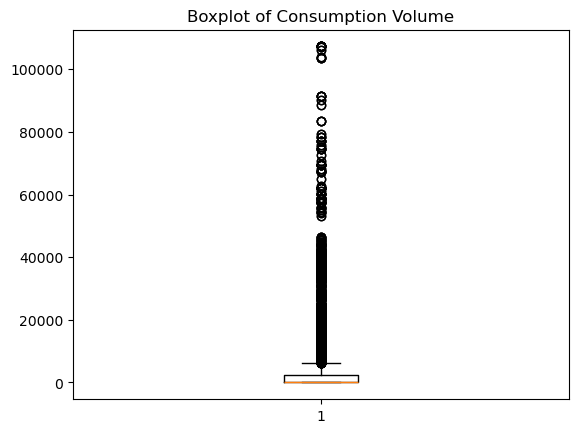

In [495]:
# Visualize outliers
import matplotlib.pyplot as plt
plt.boxplot(filtered_water_df['Withdrawal_Volume_(million_gallons)'].dropna())
plt.title('Boxplot of Consumption Volume')
plt.show()

# Step 2. Outliers

In [497]:
# Calculate Q1, Q3, and IQR
Q1 = filtered_water_df['Withdrawal_Volume_(million_gallons)'].quantile(0.25)
Q3 = filtered_water_df['Withdrawal_Volume_(million_gallons)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Withdrawal_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Withdrawal_Volume_(million_gallons)'] > upper_bound)]

# Get the number of outlier rows
num_outlier_rows = outlier_rows.shape[0]

# Get the number of unique Plant IDs in outlier rows
unique_plant_ids = outlier_rows['Plant Id'].nunique()

print(f"Number of outlier rows: {num_outlier_rows}")
print(f"Number of unique Plant IDs in outlier rows: {unique_plant_ids}")


Number of outlier rows: 2587
Number of unique Plant IDs in outlier rows: 88


Withdrawal Volume Outlier counts by Plant ID:
Plant Id
7873    292
634     253
7242    192
645      99
4937     77
       ... 
3797      2
2625      2
1364      2
2866      1
1915      1
Name: count, Length: 88, dtype: int64


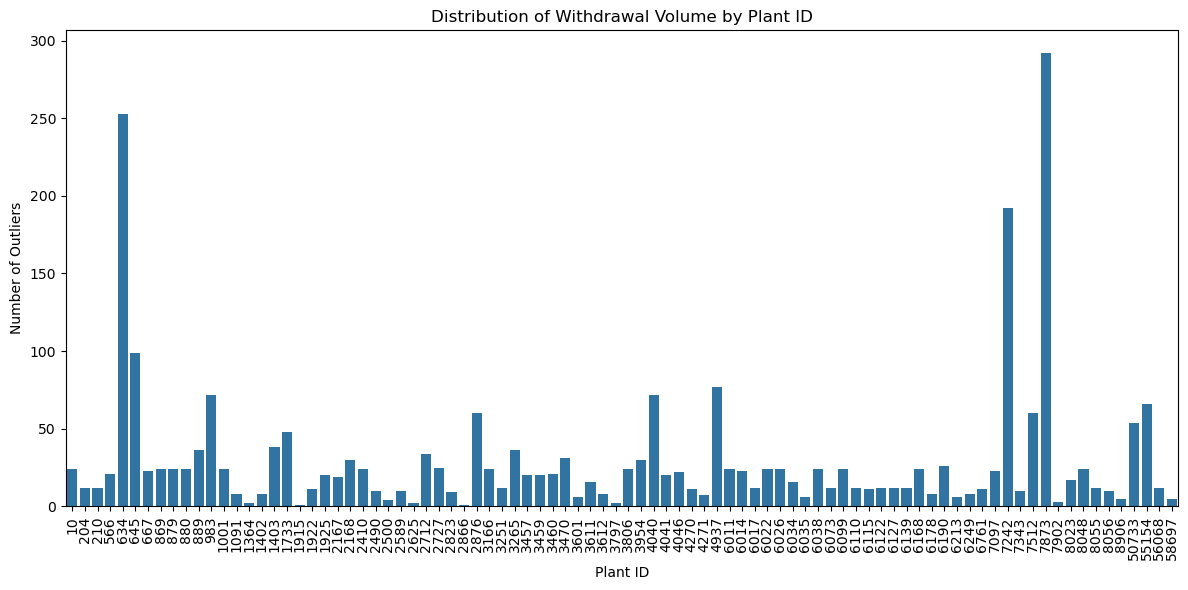

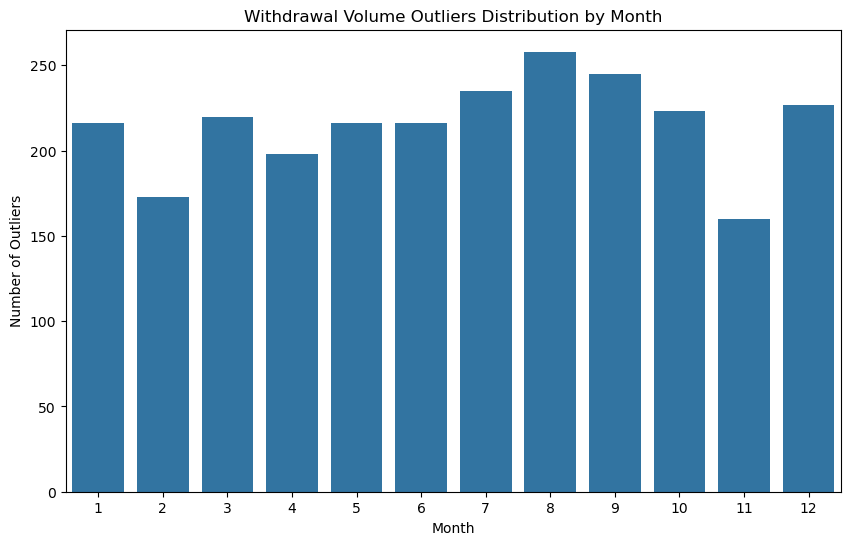

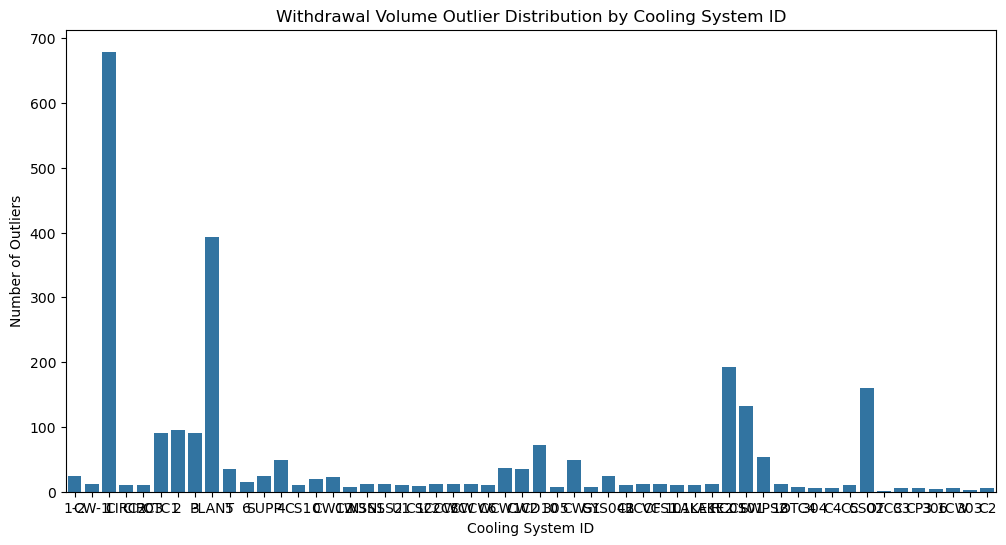

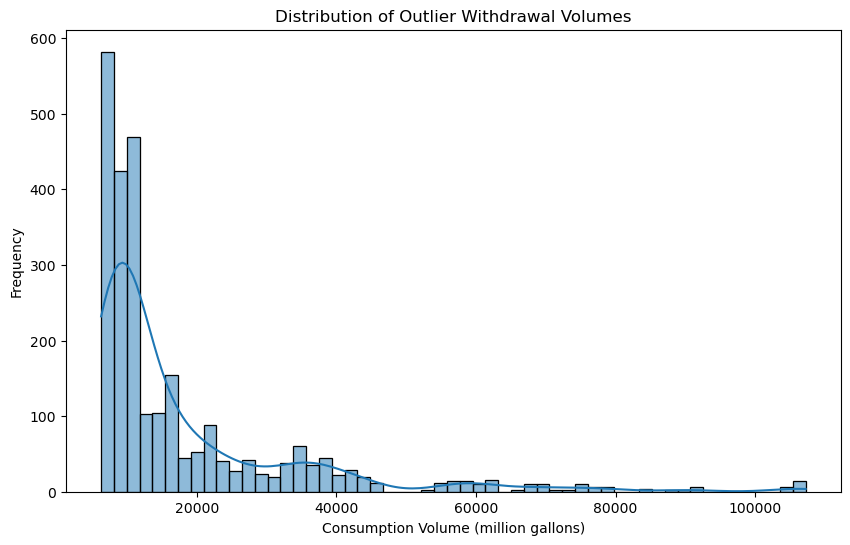

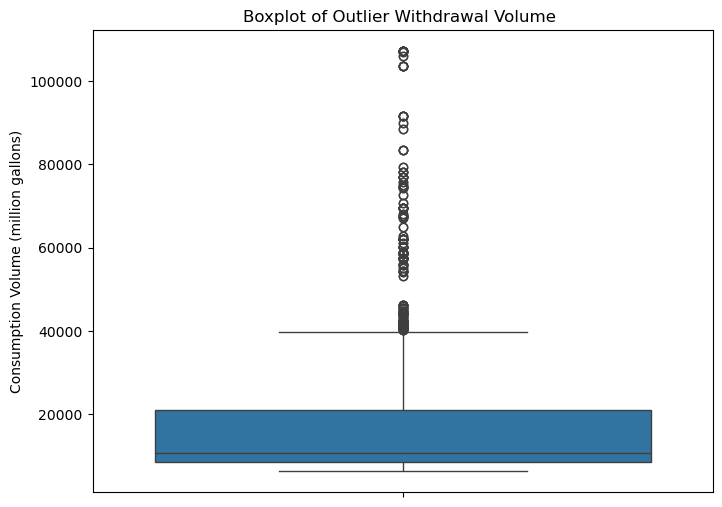

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = filtered_water_df['Withdrawal_Volume_(million_gallons)'].quantile(0.25)
Q3 = filtered_water_df['Withdrawal_Volume_(million_gallons)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Withdrawal_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Withdrawal_Volume_(million_gallons)'] > upper_bound)]

# 1. Identify Patterns Across Plant IDs
plant_id_outlier_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Withdrawal Volume Outlier counts by Plant ID:")
print(plant_id_outlier_counts)

# Plot distribution of outliers by Plant ID
plt.figure(figsize=(12, 6))
sns.barplot(x=plant_id_outlier_counts.index, y=plant_id_outlier_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Withdrawal Volume by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Number of Outliers')
plt.tight_layout()
plt.show()

# 2. Look at Other Factors (Month, Year, Cooling System)
# Month
plt.figure(figsize=(10, 6))
sns.countplot(data=outlier_rows, x='Month')
plt.title('Withdrawal Volume Outliers Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.show()

# Cooling System
plt.figure(figsize=(12, 6))
sns.countplot(data=outlier_rows, x='Cooling_System_ID')
plt.title('Withdrawal Volume Outlier Distribution by Cooling System ID')
plt.xlabel('Cooling System ID')
plt.ylabel('Number of Outliers')
plt.show()

# 3. Examine the Range of Outliers
# Histogram of outlier consumption values
plt.figure(figsize=(10, 6))
sns.histplot(outlier_rows['Withdrawal_Volume_(million_gallons)'], kde=True)
plt.title('Distribution of Outlier Withdrawal Volumes')
plt.xlabel('Consumption Volume (million gallons)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of outlier consumption values
plt.figure(figsize=(8, 6))
sns.boxplot(y=outlier_rows['Withdrawal_Volume_(million_gallons)'])
plt.title('Boxplot of Outlier Withdrawal Volume ')
plt.ylabel('Consumption Volume (million gallons)')
plt.show()


In [519]:
# 1. Count of Outliers by Plant ID
plant_id_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Count of Withdrawal Outliers by Plant ID:")
print(plant_id_counts)

# 2. Count of Outliers by Month
month_counts = outlier_rows['Month'].value_counts().sort_index()
print("\nCount of Withdrawal Outliers by Month:")
print(month_counts)

# 3. Count of Outliers by Type_of_Cooling_System
Type_of_Cooling_System_counts = outlier_rows['Type_of_Cooling_System'].value_counts().sort_index()
print("\nCount of Withdrawal Outliers by Type_of_Cooling_System:")
print(Type_of_Cooling_System_counts)

# 4. Count of Outliers by Cooling System ID
cooling_system_counts = outlier_rows['Cooling_System_ID'].value_counts().sort_index()
print("\nCount of Withdrawal Outliers by Cooling System ID:")
print(cooling_system_counts)

# 5. Count of Outliers by Water_Type
Water_Type_counts = outlier_rows['Water_Type'].value_counts().sort_index()
print("\nCount of Withdrawal Outliers by Water_Type:")
print(Water_Type_counts)

# 6. Count of Outliers by Water_Source
Water_Source_counts = outlier_rows['Water_Source'].value_counts().sort_index()
print("\nCount of Withdrawal Outliers by Water_Source:")
print(Water_Source_counts)

Count of Withdrawal Outliers by Plant ID:
Plant Id
7873    292
634     253
7242    192
645      99
4937     77
       ... 
3797      2
2625      2
1364      2
2866      1
1915      1
Name: count, Length: 88, dtype: int64

Count of Withdrawal Outliers by Month:
Month
1     216
2     173
3     220
4     198
5     216
6     216
7     235
8     258
9     245
10    223
11    160
12    227
Name: count, dtype: int64

Count of Withdrawal Outliers by Type_of_Cooling_System:
Type_of_Cooling_System
Once through with Cooling Ponds                      187
Once through without cooling pond(s) or canal(s)    1765
Recirculating with Cooling Ponds                     635
Name: count, dtype: int64

Count of Withdrawal Outliers by Cooling System ID:
Cooling_System_ID
0          20
1         679
1-2        24
101        11
13         12
1CCW       12
1CW         6
2          95
2CCW       12
3          91
303         3
304         6
305         7
306         4
3CCW       12
4          49
5          35
6 

# Step 3. Flag Withdrawal_Volume Outliers

In [521]:
# Create the 'Outlier_Flag_Withdrawal' column
filtered_water_df['Outlier_Flag_Withdrawal'] = ((filtered_water_df['Withdrawal_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Withdrawal_Volume_(million_gallons)'] > upper_bound)).astype(int)

# Verify the flagging
print(filtered_water_df['Outlier_Flag_Withdrawal'].value_counts())

# Display some of the outlier rows to confirm
outlier_rows_withdrawal = filtered_water_df[filtered_water_df['Outlier_Flag_Withdrawal'] == 1].head()
print("\nSample Outlier Rows:")
print(outlier_rows_withdrawal)

Outlier_Flag_Withdrawal
0    13090
1     2587
Name: count, dtype: int64

Sample Outlier Rows:
   State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
0     AL  2023      1        10               1-2            1         1   
1     AL  2023      1        10               1-2            2         2   
7     IL  2023      1       204              CW-1            1      NSS1   
8     KS  2023      1       210                 1            1      NSS1   
30    CT  2023      1       566             CIRC2            2      NSS2   

   Generator_Primary_Technology  Fuel_Consumption_from_All_Fuel_Types_(MMBTU)  \
0     Natural Gas Steam Turbine                                      131136.0   
1     Natural Gas Steam Turbine                                      365857.0   
7                       Nuclear                                           NaN   
8                       Nuclear                                           NaN   
30                      Nuclear             

# Cleaning the Discharge_Volume_(million_gallons)

## Step 1: Identify Issues in the Data
Before cleaning, inspect the `Discharge_Volume_(million_gallons)` column for potential issues:
- **Missing values**: Check if there are any null or NaN entries.
- **Negative values**: Identify if there are any negative values that might indicate errors or special cases.
- **Outliers**: Detect extreme values that may not align with expected ranges.
- **Inconsistencies**: Look for formatting or data type issues (e.g., strings instead of numbers).


In [523]:
# Summary statistics
print("Summary Statistics:")
print(filtered_water_df['Discharge_Volume_(million_gallons)'].describe())
print()  # Adds a blank line

# Check for missing values
missing_count = filtered_water_df['Discharge_Volume_(million_gallons)'].isna().sum()
print("Missing Values:")
print(f"Number of missing values: {missing_count}")
print()  # Adds a blank line

# Check for negative values
negative_values = filtered_water_df[filtered_water_df['Discharge_Volume_(million_gallons)'] < 0]
print("Negative Values:")
print(negative_values)
print()  # Adds a blank line


Summary Statistics:
count     15677.000000
mean       2877.545467
std        8967.401947
min           0.000000
25%           0.378000
50%          11.480000
75%         906.000000
max      214098.600000
Name: Discharge_Volume_(million_gallons), dtype: float64

Missing Values:
Number of missing values: 0

Negative Values:
Empty DataFrame
Columns: [State, Year, Month, Plant Id, Cooling_System_ID, Generator_ID, Boiler_ID, Generator_Primary_Technology, Fuel_Consumption_from_All_Fuel_Types_(MMBTU), Coal_Consumption_(MMBTU), Natural_Gas_Consumption_(MMBTU), Petroleum_Consumption_(MMBTU), Water_Type, Water_Source, Water_Source_Name, Water_Discharge_Name, Combined_Heat_and_Power_Generator?, Type_of_Cooling_System, Diversion_Rate_(gallons_per_minute), Withdrawal_Rate_(gallons_per_minute), Discharge_Rate_(gallons_per_minute), Consumption_Rate_(gallons_per_minute), Intake_Average_Temperature_(ºF), Intake_Maximum_Temperature_(ºF), Discharge_Average_Temperature_(ºF), Discharge_Maximum_Temperature_

# Step 2: Explore Outliers

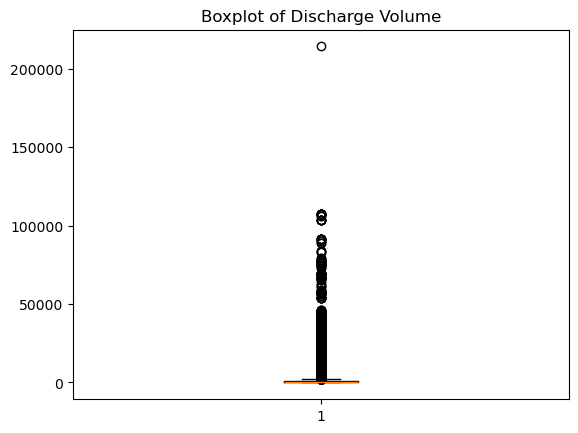

In [526]:
# Visualize outliers
import matplotlib.pyplot as plt
plt.boxplot(filtered_water_df['Discharge_Volume_(million_gallons)'].dropna())
plt.title('Boxplot of Discharge Volume')
plt.show()

Discharge Volume Outlier counts by Plant ID:
Plant Id
7873     344
634      276
7242     264
52006    120
645      116
        ... 
1400       2
8054       2
1891       2
1047       1
170        1
Name: count, Length: 97, dtype: int64


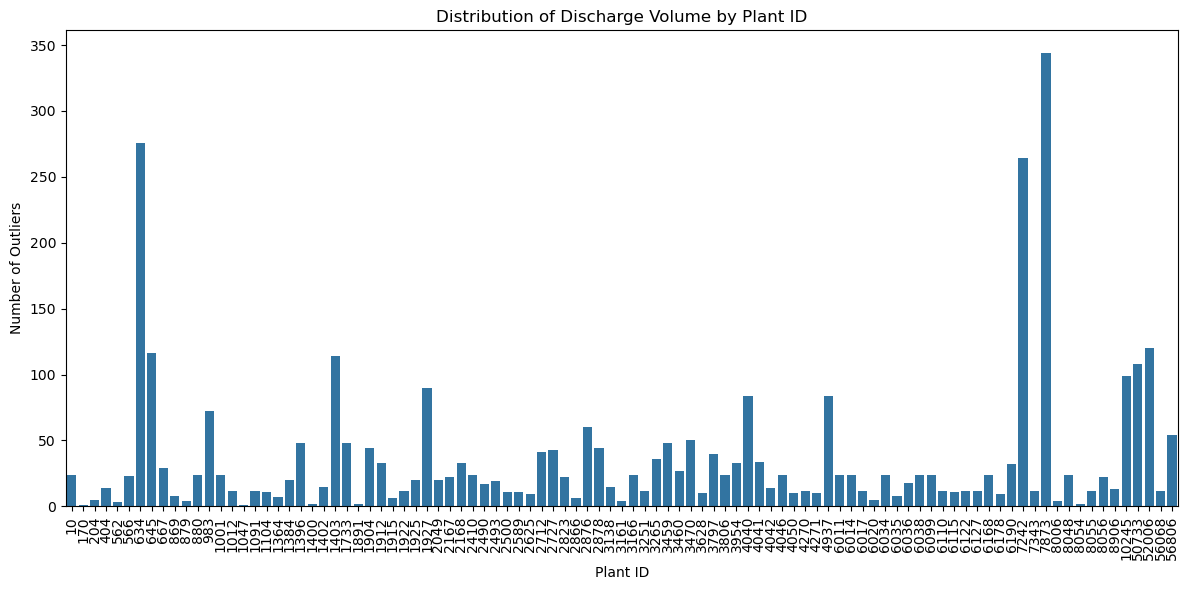

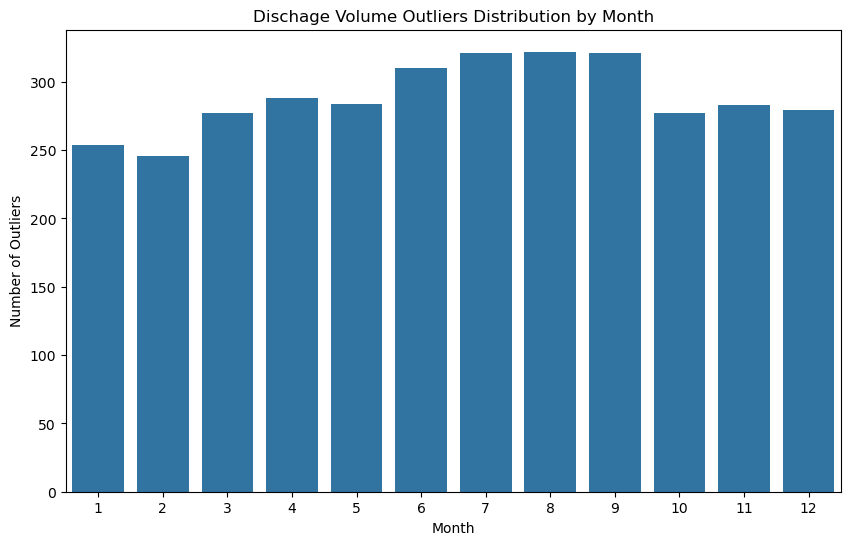

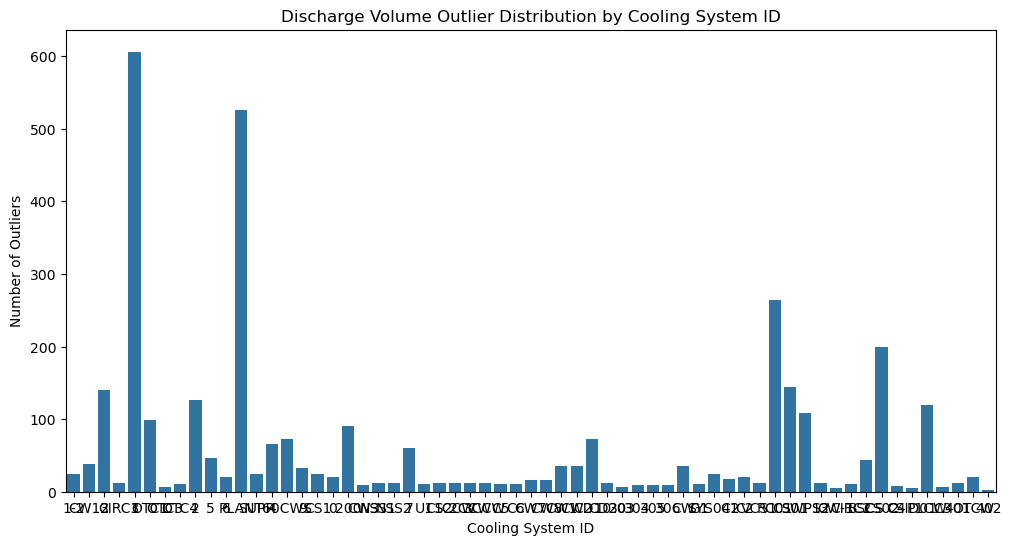

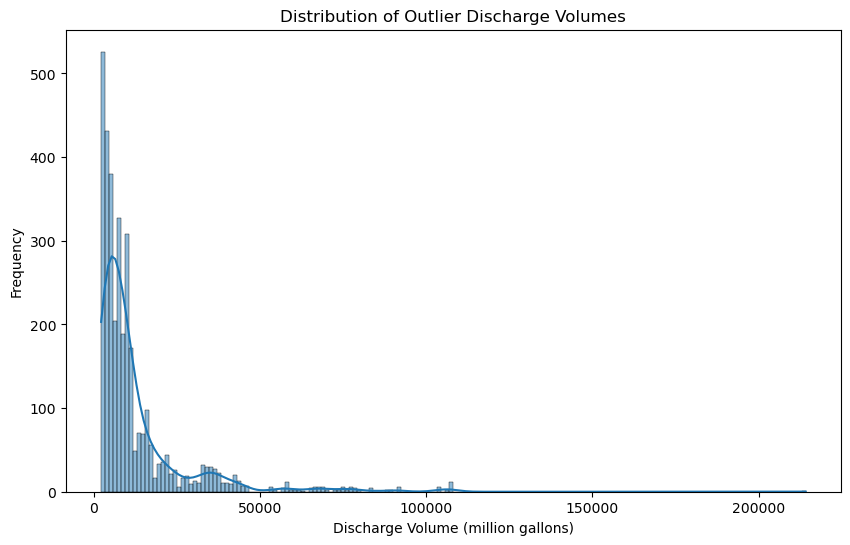

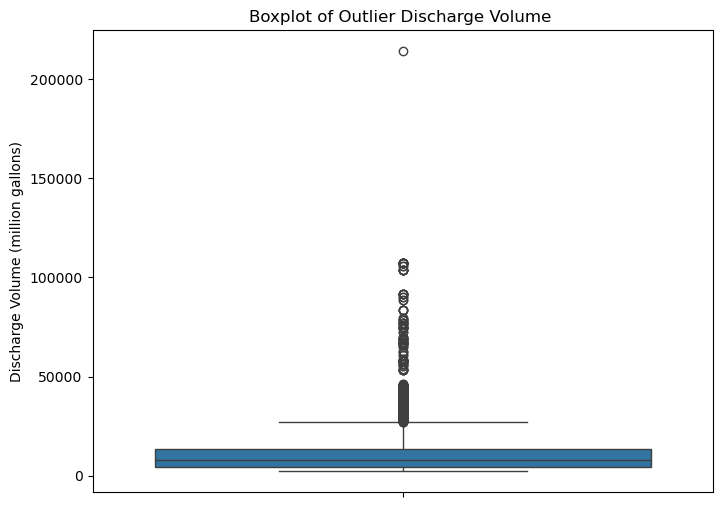

In [528]:
# Calculate Q1, Q3, and IQR
Q1 = filtered_water_df['Discharge_Volume_(million_gallons)'].quantile(0.25)
Q3 = filtered_water_df['Discharge_Volume_(million_gallons)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Discharge_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Discharge_Volume_(million_gallons)'] > upper_bound)]

# 1. Identify Patterns Across Plant IDs
plant_id_outlier_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Discharge Volume Outlier counts by Plant ID:")
print(plant_id_outlier_counts)

# Plot distribution of outliers by Plant ID
plt.figure(figsize=(12, 6))
sns.barplot(x=plant_id_outlier_counts.index, y=plant_id_outlier_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Discharge Volume by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Number of Outliers')
plt.tight_layout()
plt.show()

# 2. Look at Other Factors (Month, Year, Cooling System)
# Month
plt.figure(figsize=(10, 6))
sns.countplot(data=outlier_rows, x='Month')
plt.title('Dischage Volume Outliers Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.show()

# Cooling System
plt.figure(figsize=(12, 6))
sns.countplot(data=outlier_rows, x='Cooling_System_ID')
plt.title('Discharge Volume Outlier Distribution by Cooling System ID')
plt.xlabel('Cooling System ID')
plt.ylabel('Number of Outliers')
plt.show()

# 3. Examine the Range of Outliers
# Histogram of outlier consumption values
plt.figure(figsize=(10, 6))
sns.histplot(outlier_rows['Discharge_Volume_(million_gallons)'], kde=True)
plt.title('Distribution of Outlier Discharge Volumes')
plt.xlabel('Discharge Volume (million gallons)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of outlier consumption values
plt.figure(figsize=(8, 6))
sns.boxplot(y=outlier_rows['Discharge_Volume_(million_gallons)'])
plt.title('Boxplot of Outlier Discharge Volume ')
plt.ylabel('Discharge Volume (million gallons)')
plt.show()


In [530]:
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_rows = filtered_water_df[(filtered_water_df['Discharge_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Discharge_Volume_(million_gallons)'] > upper_bound)]

# Get the number of outlier rows
num_outlier_rows = outlier_rows.shape[0]

# Get the number of unique Plant IDs in outlier rows
unique_plant_ids = outlier_rows['Plant Id'].nunique()

print(f"Number of outlier rows: {num_outlier_rows}")
print(f"Number of unique Plant IDs in outlier rows: {unique_plant_ids}")


Number of outlier rows: 3462
Number of unique Plant IDs in outlier rows: 97


In [532]:
# 1. Count of Outliers by Plant ID
plant_id_counts = outlier_rows['Plant Id'].value_counts().sort_values(ascending=False)
print("Count of Discharge Outliers by Plant ID:")
print(plant_id_counts)

# 2. Count of Outliers by Month
month_counts = outlier_rows['Month'].value_counts().sort_index()
print("\nCount of Discharge Outliers by Month:")
print(month_counts)

# 3. Count of Outliers by Type_of_Cooling_System
Type_of_Cooling_System_counts = outlier_rows['Type_of_Cooling_System'].value_counts().sort_index()
print("\nCount of Discharge Outliers by Type_of_Cooling_System:")
print(Type_of_Cooling_System_counts)

# 4. Count of Outliers by Cooling System ID
cooling_system_counts = outlier_rows['Cooling_System_ID'].value_counts().sort_index()
print("\nCount of Discharge Outliers by Cooling System ID:")
print(cooling_system_counts)

# 5. Count of Outliers by Water_Type
Water_Type_counts = outlier_rows['Water_Type'].value_counts().sort_index()
print("\nCount of Discharge Outliers by Water_Type:")
print(Water_Type_counts)

# 6. Count of Outliers by Water_Source
Water_Source_counts = outlier_rows['Water_Source'].value_counts().sort_index()
print("\nCount of Discharge Outliers by Water_Source:")
print(Water_Source_counts)

Count of Discharge Outliers by Plant ID:
Plant Id
7873     344
634      276
7242     264
52006    120
645      116
        ... 
1400       2
8054       2
1891       2
1047       1
170        1
Name: count, Length: 97, dtype: int64

Count of Discharge Outliers by Month:
Month
1     254
2     246
3     277
4     288
5     284
6     310
7     321
8     322
9     321
10    277
11    283
12    279
Name: count, dtype: int64

Count of Discharge Outliers by Type_of_Cooling_System:
Type_of_Cooling_System
Once through with Cooling Ponds                      373
Once through without cooling pond(s) or canal(s)    2752
Recirculating with Cooling Ponds                     314
Recirculating with Induced Draft Cooling Tower        18
Recirculating with Natural Draft Cooling Tower         5
Name: count, dtype: int64

Count of Discharge Outliers by Cooling System ID:
Cooling_System_ID
0          20
1         606
1-2        24
13         12
1CCW       12
         ... 
SUPP       24
SWPS2     108
SYS042 

# Step 3. Flag Discharge Volume Outliers

In [535]:
# Create the 'Outlier_Flag_Discharge' column
filtered_water_df['Outlier_Flag_Discharge'] = ((filtered_water_df['Discharge_Volume_(million_gallons)'] < lower_bound) | (filtered_water_df['Discharge_Volume_(million_gallons)'] > upper_bound)).astype(int)

# Verify the flagging
print(filtered_water_df['Outlier_Flag_Discharge'].value_counts())

# Display some of the outlier rows to confirm
outlier_rows_discharge = filtered_water_df[filtered_water_df['Outlier_Flag_Discharge'] == 1].head()
print("\nSample Outlier Rows:")
print(outlier_rows_discharge)

Outlier_Flag_Discharge
0    12215
1     3462
Name: count, dtype: int64

Sample Outlier Rows:
   State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
0     AL  2023      1        10               1-2            1         1   
1     AL  2023      1        10               1-2            2         2   
16    CA  2023      1       404              CW12            1         1   
17    CA  2023      1       404              CW12            2         2   
29    CT  2023      1       562                 3            3         3   

   Generator_Primary_Technology  Fuel_Consumption_from_All_Fuel_Types_(MMBTU)  \
0     Natural Gas Steam Turbine                                      131136.0   
1     Natural Gas Steam Turbine                                      365857.0   
16    Natural Gas Steam Turbine                                      107679.0   
17    Natural Gas Steam Turbine                                       37181.0   
29    Natural Gas Steam Turbine              

In [537]:
filtered_water_df.columns

Index(['State', 'Year', 'Month', 'Plant Id', 'Cooling_System_ID',
       'Generator_ID', 'Boiler_ID', 'Generator_Primary_Technology',
       'Fuel_Consumption_from_All_Fuel_Types_(MMBTU)',
       'Coal_Consumption_(MMBTU)', 'Natural_Gas_Consumption_(MMBTU)',
       'Petroleum_Consumption_(MMBTU)', 'Water_Type', 'Water_Source',
       'Water_Source_Name', 'Water_Discharge_Name',
       'Combined_Heat_and_Power_Generator?', 'Type_of_Cooling_System',
       'Diversion_Rate_(gallons_per_minute)',
       'Withdrawal_Rate_(gallons_per_minute)',
       'Discharge_Rate_(gallons_per_minute)',
       'Consumption_Rate_(gallons_per_minute)',
       'Intake_Average_Temperature_(ºF)', 'Intake_Maximum_Temperature_(ºF)',
       'Discharge_Average_Temperature_(ºF)',
       'Discharge_Maximum_Temperature_(ºF)',
       'Diversion_Volume_(million_gallons)',
       'Withdrawal_Volume_(million_gallons)',
       'Discharge_Volume_(million_gallons)',
       'Consumption_Volume_(million_gallons)', 'in_df_18_o

# Generate a column for all three outliers

In [539]:
# Count rows where all three outlier flags are True (1)
count_all_three_outliers = filtered_water_df[
    (filtered_water_df['Outlier_Flag_Consumption'] == 1) &
    (filtered_water_df['Outlier_Flag_Withdrawal'] == 1) &
    (filtered_water_df['Outlier_Flag_Discharge'] == 1)
].shape[0]

print(f"Number of rows with all three outlier flags set: {count_all_three_outliers}")


Number of rows with all three outlier flags set: 205


In [542]:
# Create a new column 'All_Three_Outlier_Flag'
filtered_water_df['All_Three_Outlier_Flag'] = (
    (filtered_water_df['Outlier_Flag_Consumption'] == 1) &
    (filtered_water_df['Outlier_Flag_Withdrawal'] == 1) &
    (filtered_water_df['Outlier_Flag_Discharge'] == 1)
).astype(int)

# Verify the flagging
print(filtered_water_df['All_Three_Outlier_Flag'].value_counts())

# Now you can easily filter these rows
all_three_outliers = filtered_water_df[filtered_water_df['All_Three_Outlier_Flag'] == 1]
print(all_three_outliers.head())


All_Three_Outlier_Flag
0    15472
1      205
Name: count, dtype: int64
    State  Year  Month  Plant Id Cooling_System_ID Generator_ID Boiler_ID  \
87     IN  2023      1      1001              SUPP            1         1   
88     IN  2023      1      1001              SUPP            2         2   
142    MI  2023      1      1733             PLANT            1         1   
143    MI  2023      1      1733             PLANT            2         2   
144    MI  2023      1      1733             PLANT            3         3   

    Generator_Primary_Technology  \
87       Conventional Steam Coal   
88       Conventional Steam Coal   
142      Conventional Steam Coal   
143      Conventional Steam Coal   
144      Conventional Steam Coal   

     Fuel_Consumption_from_All_Fuel_Types_(MMBTU)  Coal_Consumption_(MMBTU)  \
87                                      2433981.0                 2433981.0   
88                                       990502.0                  986701.0   
142         

# NEXT: Figuring out what to do about Fuel consumption attributes. 

In [548]:
filtered_water_df[['Fuel_Consumption_from_All_Fuel_Types_(MMBTU)',
       'Coal_Consumption_(MMBTU)', 'Natural_Gas_Consumption_(MMBTU)',
       'Petroleum_Consumption_(MMBTU)']].describe()

,Fuel_Consumption_from_All_Fuel_Types_(MMBTU),Coal_Consumption_(MMBTU),Natural_Gas_Consumption_(MMBTU),Petroleum_Consumption_(MMBTU)
count,1.421400e+04,1.899000e+03,1.305500e+04,3.771000e+03
mean,6.206719e+05,1.154985e+06,4.919349e+05,1.375535e+04
std,6.869058e+05,1.180809e+06,5.195696e+05,9.801998e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.694975e+04,2.230400e+04,7.076000e+03,0.000000e+00
50%,4.899980e+05,8.345570e+05,4.064400e+05,0.000000e+00
75%,9.628940e+05,2.003722e+06,7.737810e+05,9.645000e+02
max,5.137273e+06,5.137273e+06,3.907731e+06,1.409536e+06


In [550]:
# List of fuel consumption columns
fuel_cols = [
    'Fuel_Consumption_from_All_Fuel_Types_(MMBTU)',
    'Coal_Consumption_(MMBTU)',
    'Natural_Gas_Consumption_(MMBTU)',
    'Petroleum_Consumption_(MMBTU)'
]

# Count non-missing values for each column
completeness_counts = filtered_water_df[fuel_cols].count()

print("Completeness Counts for Fuel Consumption Attributes:")
print(completeness_counts)


Completeness Counts for Fuel Consumption Attributes:
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)    14214
Coal_Consumption_(MMBTU)                         1899
Natural_Gas_Consumption_(MMBTU)                 13055
Petroleum_Consumption_(MMBTU)                    3771
dtype: int64


In [571]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/cleaned'
output_file = 'filtered_water_df_WMETRICS_cleaned.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
filtered_water_df.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'filtered_water_df_WMETRICS_cleaned.csv' has been created successfully.


In [623]:
filtered_water_df.shape

(15677, 45)

In [625]:
num_unique_plants_filtered = filtered_water_df['Plant Id'].nunique()
print(f"Number of unique Plant IDs in filtered_water_df: {num_unique_plants_filtered}")

Number of unique Plant IDs in filtered_water_df: 219


# Okay...we're going to figure out how to bring in attributes from df_1_USPR + df_3_transformed; especially re: Fuel Consumption + Electricity Generation

In [722]:
df_1_USPR = pd.read_csv('/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/df_1_USPR_transformed.csv')

## df_1_USPR

In [665]:
df_1_USPR.columns

Index(['YEAR', 'Plant Id', 'Nuclear Unit Id', 'Combined Heat And Power Plant',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'EIA Sector Number', 'Sector Name',
       'NAICS Code', 'Reported Prime Mover', 'Reported Fuel Type Code',
       'MER Fuel Type Code', 'Balancing Authority Code', 'Physical Unit Label',
       'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
       'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
       'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
       'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May',
       'Elec_MMBtu May', 'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June',
       'Netgen June', 'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
       'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
       'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
       'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen

In [667]:
# Step 1: Initial assessment
import pandas as pd

# Total Fuel Consumption MMBtu, Elec Fuel Consumption MMBtu
fuel_cols = [
    'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
       'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
       'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
       'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May',
       'Elec_MMBtu May', 'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June',
       'Netgen June', 'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
       'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
       'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
       'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen October',
       'Tot_MMBtu November', 'Elec_MMBtu November', 'Netgen November',
       'Tot_MMBtu December', 'Elec_MMBtu December', 'Netgen December',
       'Total Fuel Consumption MMBtu', 'Elec Fuel Consumption MMBtu',
       'Net Generation (Megawatthours)'
]

# Check for missing values in the fuel consumption columns
missing_values = df_1_USPR[fuel_cols].isnull().sum()
print("Missing Values in Fuel Consumption Columns:\n", missing_values)

# Get descriptive statistics for these columns
descriptive_stats = df_1_USPR[fuel_cols].describe()
print("\nDescriptive Statistics for Fuel Consumption Columns:\n", descriptive_stats)


Missing Values in Fuel Consumption Columns:
 Tot_MMBtu January                 590
Elec_MMBtu January                590
Netgen January                    590
Tot_MMBtu February                582
Elec_MMBtu February               582
Netgen February                   582
Tot_MMBtu March                   564
Elec_MMBtu March                  564
Netgen March                      564
Tot_MMBtu April                   545
Elec_MMBtu April                  545
Netgen April                      545
Tot_MMBtu May                     538
Elec_MMBtu May                    538
Netgen May                        538
Tot_MMBtu June                    527
Elec_MMBtu June                   527
Netgen June                       527
Tot_MMBtu July                    511
Elec_MMBtu July                   511
Netgen July                       511
Tot_MMBtu August                  498
Elec_MMBtu August                 498
Netgen August                     498
Tot_MMBtu September               493
Elec_

### Step 1: Filter df_1_USPR to Include Only Relevant Plants
We'll create a subset of df_1_USPR that includes only the plants whose Plant Id values are present in filtered_water_df.

In [631]:
import pandas as pd

# Number of unique Plant IDs in df_1_USPR
num_unique_plants_USPR = df_1_USPR['Plant Id'].nunique()
print(f"Number of unique Plant IDs in df_1_USPR: {num_unique_plants_USPR}")

# Get the unique Plant IDs from each DataFrame
unique_plants_filtered = set(filtered_water_df['Plant Id'].unique())
unique_plants_USPR = set(df_1_USPR['Plant Id'].unique())

# Find the intersection of the two sets to get the shared Plant IDs
shared_plants = unique_plants_filtered.intersection(unique_plants_USPR)

# Count the number of shared Plant IDs
num_shared_plants = len(shared_plants)

print(f"Number of shared unique Plant IDs between the two DataFrames: {num_shared_plants}")


Number of unique Plant IDs in df_1_USPR: 12354
Number of shared unique Plant IDs between the two DataFrames: 219


In [655]:
# Get unique Plant IDs from filtered_water_df
relevant_plant_ids = filtered_water_df['Plant Id'].unique()

# Filter df_1_USPR to include only relevant plants
df_1_USPR_filtered = df_1_USPR[df_1_USPR['Plant Id'].isin(relevant_plant_ids)].copy()

# Verify the number of unique Plant IDs and Plant Names
num_unique_plant_ids = df_1_USPR_filtered['Plant Id'].nunique()
num_unique_plant_names = df_1_USPR_filtered['Plant Name'].nunique()

print(f"Number of unique Plant IDs in df_1_USPR_filtered: {num_unique_plant_ids}")
print(f"Number of unique Plant Names in df_1_USPR_filtered: {num_unique_plant_names}")


Number of unique Plant IDs in df_1_USPR_filtered: 219
Number of unique Plant Names in df_1_USPR_filtered: 219


In [678]:
df_1_USPR_filtered.shape

(683, 57)

In [669]:
df_1_USPR_filtered[['Total Fuel Consumption MMBtu',
'Elec Fuel Consumption MMBtu', 
'Net Generation (Megawatthours)']].describe()      

,Total Fuel Consumption MMBtu,Elec Fuel Consumption MMBtu,Net Generation (Megawatthours)
count,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.542842e+07,1.508838e+07,1.579296e+06
std,2.765278e+07,2.755217e+07,2.613464e+06
min,0.000000e+00,0.000000e+00,-7.625153e+03
25%,0.000000e+00,0.000000e+00,3.645750e+01
50%,3.085520e+05,2.444520e+05,8.548711e+04
75%,1.690022e+07,1.625193e+07,2.024932e+06
max,1.198734e+08,1.198734e+08,1.146921e+07


### Analysis of Filtered Power Plant Data

#### Efficiency
The average power plant in this dataset consumes 15,428,420 MMBtu of total fuel and generates 1,579,296 MWh of electricity. This translates to an average efficiency of about 34.8%, which is within the typical range for power plants.

#### Electric vs. Non-Electric Fuel Consumption
The mean Electric Fuel Consumption (15,088,380 MMBtu) is very close to the mean Total Fuel Consumption (15,428,420 MMBtu), suggesting that most of the fuel is used for electricity generation. The small difference could be attributed to non-electric uses such as heating or industrial processes.

#### Variability
The standard deviations for all three metrics are significantly larger than their means, indicating high variability among the plants. This suggests a diverse mix of plant sizes and types in the dataset.

#### Negative Net Generation
The minimum Net Generation value is negative (-7,625.153 MWh), which could indicate power consumption during downtime or for plant operations. This is not uncommon, especially for plants that may sometimes draw power from the grid.

#### Distribution Skew
The median (50th percentile) values are much lower than the means for all three metrics, indicating a right-skewed distribution. This suggests that there are a few very large plants pulling up the average.

#### Zero Values
The 25th percentile is 0 for both fuel consumption metrics, suggesting that at least 25% of the plants had no fuel consumption during the period. This could indicate intermittent operation, especially for renewable sources like wind or solar.

#### Maximum Values
The maximum values for Total and Electric Fuel Consumption are identical (119,873,400 MMBtu), suggesting that the largest plant in the dataset uses all its fuel for electricity generation.

#### Capacity Factor
Using the mean values, we can estimate an average capacity factor. If we assume the mean Net Generation (1,579,296 MWh) is annual, this translates to an average output of about 180 MW. Given the fuel consumption, this likely represents a mix of baseload and peaker plants, as well as some renewable sources.


In [676]:
# Step 2 Completeness check

# Count non-missing values for each column
completeness_counts = df_1_USPR_filtered[fuel_cols].count()
print("\nCompleteness counts:\n", completeness_counts)



Completeness counts:
 Tot_MMBtu January                 674
Elec_MMBtu January                674
Netgen January                    674
Tot_MMBtu February                662
Elec_MMBtu February               662
Netgen February                   662
Tot_MMBtu March                   677
Elec_MMBtu March                  677
Netgen March                      677
Tot_MMBtu April                   676
Elec_MMBtu April                  676
Netgen April                      676
Tot_MMBtu May                     676
Elec_MMBtu May                    676
Netgen May                        676
Tot_MMBtu June                    664
Elec_MMBtu June                   664
Netgen June                       664
Tot_MMBtu July                    664
Elec_MMBtu July                   664
Netgen July                       664
Tot_MMBtu August                  673
Elec_MMBtu August                 673
Netgen August                     673
Tot_MMBtu September               669
Elec_MMBtu September       

## Data Imputation for Energy Consumption and Generation

### Rationale for Imputation
Our dataset contains monthly energy consumption and generation data for various power plants. While most entries are complete, some months have missing values. Given that:

1. The number of missing entries is relatively small (less than 5% for any given month).
2. We're primarily interested in broad patterns rather than individual plant performance.
3. Removing rows with missing data could potentially bias our analysis.

We chose to impute the missing values using the median of each respective column.

### Imputation Method
- **Median Imputation**: We used the median (rather than mean) to fill in missing values because:
  - It's less sensitive to outliers, which are common in energy data.
  - It preserves the overall distribution of the data better than mean imputation.

### Scope of Imputation
We only imputed values for the following types of columns:
- Total MMBtu consumption per month
- Electric MMBtu consumption per month
- Net generation per month

Other categorical or identifying columns were left as-is to maintain data integrity.

### Impact on Analysis
While imputation allows us to retain all data points, it's important to note:
- Imputed values may slightly reduce the variance in our dataset.
- Any analysis of extreme values or outliers should be conducted with caution.
- The imputation maintains the overall trends and patterns in the data, which aligns with our goal of understanding broad energy consumption and generation patterns.

By using this approach, we've created a complete dataset that enables comprehensive analysis while minimizing the impact of missing data on our results.


In [692]:
# List of columns to impute
columns_to_impute = [
    'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
    'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
    'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
    'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 
    'Tot_MMBtu May', 'Elec_MMBtu May', 'Netgen May', 
    'Tot_MMBtu June', 'Elec_MMBtu June', 'Netgen June', 
    'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
    'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
    'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
    'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen October',
    'Tot_MMBtu November', 'Elec_MMBtu November', 'Netgen November',
    'Tot_MMBtu December', 'Elec_MMBtu December', 'Netgen December'
]

# Impute missing values with median for specified columns
df_cleaned = df_1_USPR_filtered.copy()
df_cleaned[columns_to_impute] = df_cleaned[columns_to_impute].fillna(df_cleaned[columns_to_impute].median())

# Verify that all specified columns now have 683 rows
print(df_cleaned[columns_to_impute].count())

# Check if there are any remaining null values in the imputed columns
print(df_cleaned[columns_to_impute].isnull().sum().sum())


Tot_MMBtu January       683
Elec_MMBtu January      683
Netgen January          683
Tot_MMBtu February      683
Elec_MMBtu February     683
Netgen February         683
Tot_MMBtu March         683
Elec_MMBtu March        683
Netgen March            683
Tot_MMBtu April         683
Elec_MMBtu April        683
Netgen April            683
Tot_MMBtu May           683
Elec_MMBtu May          683
Netgen May              683
Tot_MMBtu June          683
Elec_MMBtu June         683
Netgen June             683
Tot_MMBtu July          683
Elec_MMBtu July         683
Netgen July             683
Tot_MMBtu August        683
Elec_MMBtu August       683
Netgen August           683
Tot_MMBtu September     683
Elec_MMBtu September    683
Netgen September        683
Tot_MMBtu October       683
Elec_MMBtu October      683
Netgen October          683
Tot_MMBtu November      683
Elec_MMBtu November     683
Netgen November         683
Tot_MMBtu December      683
Elec_MMBtu December     683
Netgen December     

In [695]:
df_cleaned.columns

Index(['YEAR', 'Plant Id', 'Nuclear Unit Id', 'Combined Heat And Power Plant',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'EIA Sector Number', 'Sector Name',
       'NAICS Code', 'Reported Prime Mover', 'Reported Fuel Type Code',
       'MER Fuel Type Code', 'Balancing Authority Code', 'Physical Unit Label',
       'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
       'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
       'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
       'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May',
       'Elec_MMBtu May', 'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June',
       'Netgen June', 'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
       'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
       'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
       'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen

In [697]:
df_cleaned.shape

(683, 57)

In [705]:
categorical_columns = [
    'Nuclear Unit Id', 'Combined Heat And Power Plant',
    'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
    'Census Region', 'NERC Region', 'EIA Sector Number', 'Sector Name',
    'NAICS Code', 'Reported Prime Mover', 'Reported Fuel Type Code',
    'MER Fuel Type Code', 'Balancing Authority Code', 'Physical Unit Label'
]

summary_stats = df_cleaned[categorical_columns].describe(include='object')
print(summary_stats)


       Nuclear Unit Id Plant Name                 Operator Name Plant State  \
count              683        683                           683         683   
unique               4        219                           132          37   
top                  .   Big Bend  Virginia Electric & Power Co          TX   
freq               622         10                            27          68   

       Census Region NERC Region       Sector Name Reported Prime Mover  \
count            683         683               683                  683   
unique             9           6                 5                    9   
top              SAT        SERC  Electric Utility                   ST   
freq             167         278               424                  379   

       Reported Fuel Type Code MER Fuel Type Code Balancing Authority Code  \
count                      683                683                      683   
unique                      28                 15                       

In [715]:
# Remove Nuclear Unit Id column since majority missing.

# Remove the 'Nuclear Unit Id' column
df_cleaned = df_cleaned.drop('Nuclear Unit Id', axis=1)

# Verify the column has been removed
print(df_cleaned.columns)


Index(['YEAR', 'Plant Id', 'Combined Heat And Power Plant', 'Plant Name',
       'Operator Name', 'Operator Id', 'Plant State', 'Census Region',
       'NERC Region', 'EIA Sector Number', 'Sector Name', 'NAICS Code',
       'Reported Prime Mover', 'Reported Fuel Type Code', 'MER Fuel Type Code',
       'Balancing Authority Code', 'Physical Unit Label', 'Tot_MMBtu January',
       'Elec_MMBtu January', 'Netgen January', 'Tot_MMBtu February',
       'Elec_MMBtu February', 'Netgen February', 'Tot_MMBtu March',
       'Elec_MMBtu March', 'Netgen March', 'Tot_MMBtu April',
       'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May', 'Elec_MMBtu May',
       'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June', 'Netgen June',
       'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July', 'Tot_MMBtu August',
       'Elec_MMBtu August', 'Netgen August', 'Tot_MMBtu September',
       'Elec_MMBtu September', 'Netgen September', 'Tot_MMBtu October',
       'Elec_MMBtu October', 'Netgen October', 'Tot_MMB

In [717]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/cleaned'
output_file = 'df_1_USPR_filtereddown.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_cleaned.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_1_USPR_filtereddown.csv' has been created successfully.


# PROJECT CHECK-IN:
# 📌 Project Plan: Electricity Generation & Water Consumption in the US

## **Overview**
This project analyzes electricity generation and water consumption at US power plants, with a focus on data cleaning, feature engineering, and preparing datasets for future modeling. The key challenge has been integrating incomplete fuel consumption data across different granularities.

---

## **🔄 Plan for Data Preparation & Cleaning**
### **1️⃣ Filtered Water Dataset (`filtered_water_df` --> 'filtered_water_df_WMETRICS_cleaned.csv')**
- **Scope:** Focuses exclusively on water metrics at the **Year-Month-Plant ID-Cooling System ID-Boiler ID-Generator ID** level.  
- **Actions:**
  - Merge **categorical plant-level details** (e.g., Census regions, EIA sector) from `df_1_USPR`.  
  - 🚫 **Remove** fuel consumption metrics to avoid inconsistencies in granularity.  

### **2️⃣ Fuel & Generation Dataset (`df_1_USPR`--> 'df_cleaned' ('df_1_USPR_filtereddown.csv'))**
- **Scope:** Covers fuel consumption and electricity generation at the **Year-Plant ID-Primary Mover-Reported Fuel Type** level.  
- **Actions:**
  - Handle **<5% missing fuel data** using imputation (e.g., median values or time-series interpolation).  
  - Keep fuel-specific analysis separate from water-focused datasets.  

### **3️⃣ Energy Storage Plants Dataset**
- **Scope:** Similar preprocessing and cleaning to ensure consistency.  
- **Actions:** Apply same cleaning methods used for water & fuel datasets.
  
### **4️⃣ Data Centers Dataset (🚀 First Draft)**
- **Scope:** Custom-built dataset (not available in standard sources).  
- **Actions:** Create a v1 dataset based on Google AI's provided list + Kaggle sources.  

---

## **📌 Next Steps**
1. Complete **data cleaning & feature engineering** steps above.  
2. **Submit plan & cleaned datasets** for tutor review.  
3. Once approved, shift focus to **EDA, modeling, and storytelling** for insights.  


# LAST DATAFRAME: Energy Storage Plants

In [724]:
df_3_transformed = pd.read_csv('/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/df_3_transformed.csv')

# Energy Storage Plants Data Cleaning (df_3_transformed)

## 1. Initial Data Inspection

In [735]:
# Get unique Plant IDs from filtered_water_df
relevant_plant_ids = filtered_water_df['Plant Id'].unique()

# Filter df_3_transformed to include only relevant plants
df_3_transformed_FILTERED = df_3_transformed[df_3_transformed['Plant Id'].isin(relevant_plant_ids)].copy()

# Verify the number of unique Plant IDs and Plant Names
num_unique_plant_ids = df_3_transformed_FILTERED['Plant Id'].nunique()
num_unique_plant_names = df_3_transformed_FILTERED['Plant Name'].nunique()

print(f"Number of unique Plant IDs in df_3_transformed_FILTERED: {num_unique_plant_ids}")
print(f"Number of unique Plant Names in df_3_transformed_FILTERED: {num_unique_plant_names}")

# Display the first few rows of the filtered dataframe
print(df_3_transformed_FILTERED.head())

# Get summary statistics of the filtered dataframe
print(df_3_transformed_FILTERED.describe())


Number of unique Plant IDs in df_3_transformed_FILTERED: 2
Number of unique Plant Names in df_3_transformed_FILTERED: 2
    YEAR  Plant Id  Combined Heat And Power Plant        Plant Name  \
16  2023       389                          False  El Centro Hybrid   
17  2023       389                          False  El Centro Hybrid   
18  2023       389                          False  El Centro Hybrid   
19  2023       389                          False  El Centro Hybrid   
20  2023       389                          False  El Centro Hybrid   

                   Operator Name  Operator Id Plant State Census Region  \
16  Imperial Irrigation District       9216.0          CA          PACC   
17  Imperial Irrigation District       9216.0          CA          PACC   
18  Imperial Irrigation District       9216.0          CA          PACC   
19  Imperial Irrigation District       9216.0          CA          PACC   
20  Imperial Irrigation District       9216.0          CA          PACC   

  

In [737]:
df_3_transformed_FILTERED.shape

(17, 69)

### ⚠️ Exclusion of Energy Storage Plants: Methodology and Rationale!
- This analysis primarily aims to assess the relationship between water usage and conventional power generation technologies. While energy storage plants are increasingly significant in modern electricity grids, their operational characteristics and water requirements differ from traditional thermal power plants. Given the distinct nature of energy storage and the limited overlap between the energy storage data and the water usage data, we have chosen to exclude energy storage plants from the primary analysis.
- Implications:
By excluding energy storage plants, our analysis will focus on the water usage patterns and sustainability practices of conventional power generation technologies (e.g., coal, natural gas, nuclear, and hydro). This approach allows for a more targeted assessment of water consumption within established power generation sectors.
- Considerations
While energy storage is excluded, the study acknowledges its growing importance in the energy sector. We recognize that incorporating energy storage in future analyses could provide additional insights into optimizing water usage and promoting sustainable practices across the entire electricity ecosystem.
